# Курсовая работа

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после изучения Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после изучения Matplotlib <br>

_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [2]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


In [1]:
### YOUR CODE HERE ###
# импортируем нужные нам библиотеки 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# посмотрим файл courses 
courses = pd.read_csv('courses.csv')
courses.head()

,Unnamed: 0,id,title,field
0,0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development


In [3]:
# посмотрим файл course_contents
course_contents = pd.read_csv('course_contents.csv')
course_contents.head()

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
3,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,1,Интро,7ea16a2d-e6d1-4158-907f-ae0ce8379c45,True,False
4,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,2,12 принципов анимации,7eea2930-11db-45c9-a16c-0d800b6dc99d,True,False


In [4]:
# посмотрим файл students
students = pd.read_csv('students.csv')
students.head()

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN


In [5]:
# посмотрим файл progresses
progresses = pd.read_csv('progresses.csv')
progresses.head()

,id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9


In [6]:
# посмотрим файл progress_phases
progress_ph = pd.read_csv('progress_phases.csv')
progress_ph.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00


In [7]:
# удалим ненужные колонки у датасетов courses и students
courses = courses.drop(courses.columns[0], axis='columns')
courses.head()

,id,title,field
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development


In [8]:
students = students.drop(students.columns[0], axis='columns')
students.head()

,id,city,birthday
0,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN


In [9]:
# размеры датасетов + сумма пропущенных значений в каждом столбце каждого датасета
list_datasets = [courses, 
                 course_contents, 
                 students, 
                 progresses, 
                 progress_ph]

for num, val in enumerate(list_datasets, 1):
    print(str(num) + ' dataset')
    print(val.shape)
    print(val.isnull().sum())
    print('-----------------------')

1 dataset
(15, 3)
id       0
title    0
field    0
dtype: int64
-----------------------
2 dataset
(1201, 8)
course_id        0
module_number    0
module_title     0
lesson_number    0
lesson_title     0
lesson_token     0
is_video         0
is_homework      0
dtype: int64
-----------------------
3 dataset
(43830, 3)
id              0
city        30668
birthday    18331
dtype: int64
-----------------------
4 dataset
(15934, 3)
id            0
student_id    0
course_id     0
dtype: int64
-----------------------
5 dataset
(350677, 6)
progress_id          0
module_number        0
lesson_number        0
status               0
start_date           0
finish_date      16169
dtype: int64
-----------------------


In [ ]:
# работаем над общим датасетом 
# main = progress_ph + progresses + courses + course_contents

In [10]:
# копия датасета progresses и переименование колонки с id прогресса в нем
progresses_copy = progresses.copy()
progresses_copy.rename(columns={'id': 'progress_id'}, inplace=True)
progresses_copy.head()

,progress_id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9


In [11]:
# объединяем 2 датасета в 1 
main_0 = pd.merge(progress_ph, progresses_copy, how='left', on='progress_id')
main_0.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b


In [12]:
# копия датасета courses и переименование колонок в нем
courses_copy = courses.copy()
courses_copy.rename(columns={'id': 'course_id', 
                             'title': 'course_title', 
                             'field': 'course_field'}, inplace=True)
courses_copy.head()

,course_id,course_title,course_field
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development


In [13]:
# объединяем 2 датасета в 1 
main_1 = pd.merge(main_0, courses_copy, how='left', on='course_id')
main_1.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design


In [14]:
# копия датасета course_contents
course_contents_copy = course_contents.copy()
course_contents_copy.head()

,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",1,Знакомство,aa344de3-1191-4e69-b485-61823118f71c,True,False
1,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",2,"Введение в Motion Design. Тренды, разновидност...",246c8429-dd18-4f3a-a9fb-d3c07e7d6912,True,False
2,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
3,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,1,Интро,7ea16a2d-e6d1-4158-907f-ae0ce8379c45,True,False
4,04ba6d0b40670c43a209141fa01fa784,2,12 принципов анимации от Walt Disney Studio,2,12 принципов анимации,7eea2930-11db-45c9-a16c-0d800b6dc99d,True,False


In [15]:
# создаем общий датасет main
main = pd.merge(main_1, course_contents_copy, how='left', 
                on=['course_id', 
                    'module_number', 
                    'lesson_number'])

main.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [16]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка 

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


In [17]:
main.shape

(350677, 15)

In [ ]:
# Отдельный датасет создаем для расчета среднего возраста студентов курсов
# students + progresses + courses 

In [18]:
# изменяем название колонки с id студента для последующего объединения
progresses_copy_2 = progresses_copy.copy()
progresses_copy_2.rename(columns={'student_id': 'id'}, inplace=True)
progresses_copy_2.head()

,progress_id,id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9


In [19]:
# объединяем 2 датасета в 1 
students_mean = pd.merge(students, progresses_copy_2, how='left', on='id')
students_mean.head()

,id,city,birthday,progress_id,course_id
0,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN,NaN,NaN
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,NaN,NaN
2,2033122d7c9b24b36eebc468d5259642,NaN,NaN,NaN,NaN
3,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN,8459fbc07e32ec92bd7b43d7df9bfa89,0770b1b039964228294f1f34b29fc2c1
4,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN,NaN,NaN


In [20]:
# Отдельный датасет для среднего возраста студентов курсов
students_mean = students_mean.merge(courses_copy, how='left', on='course_id')
students_mean.head()

,id,city,birthday,progress_id,course_id,course_title,course_field
0,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN,NaN,NaN,NaN,NaN
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,NaN,NaN,NaN,NaN
2,2033122d7c9b24b36eebc468d5259642,NaN,NaN,NaN,NaN,NaN,NaN
3,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN,8459fbc07e32ec92bd7b43d7df9bfa89,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN,NaN,NaN,NaN,NaN


In [21]:
students_mean.shape

(49966, 7)

In [22]:
students_mean.isnull().sum()

id                  0
city            31567
birthday        18912
progress_id     34032
course_id       34032
course_title    34032
course_field    34032
dtype: int64

In [23]:
students_mean['id'].nunique()
# пропущенных значений в колонке id нет, значит можно сделать вывод:
# один студент может обучаться (зарегистрирован) более чем на одном курсе
# 34032 студента не приступали к обучению: 34032 пропущенных значения в 4-х столбцах 

43830

In [24]:
# общее количество курсов в датасете
courses_copy['course_title'].nunique()

15

In [25]:
# количество модулей на каждом курсе
main.groupby('course_title')['module_title'].nunique()

course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_title, dtype: int64

In [26]:
#количество уроков в каждом модуле на каждом курсе
main_gr_les = pd.DataFrame(main.groupby(['course_title', 
                                         'module_title'])['lesson_title'].nunique())
main_gr_les

lesson_title
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                                     5
                              Основной функционал Excel                                     11
                              Основной функционал Excel (продолжение)                        7
                              Сводные таблицы Excel                                          5
                              Формулы и функции Excel. Более сложные формулы                 5
                              Формулы и функции Excel. Введение                              3
                              Формулы и функции Excel. Продолжаем работать с ...             7
                              Формулы и функции Excel. Работа с ошибками, про...             5
                              Экзаменационная работа                                         1
Java-разработчик              Вводный модуль                                                 8
                              Веб-приложения: формы, заголовки и сессии                      6
                              Внешний вид GUI и рисование                                    7
                              Заключительный модуль                                          8
                              Итоговая тема                                                  1
                              Массивы и коллекции                                            7
                              Многопоточность                                                7
                              Наследование и полиморфизм                                     6
                              Объекты и классы                                               9
                              Оптимизация кода и приложений                                  5
                              Основы построения GUI                                          7
                              Основы построения веб-приложений                               7
                              Работа с базами данных                                         6
                              Работа с файлами и сетью                                       8
                              Синтаксис языка                                                8
                              Тестирование и отладка                                         5
                              Числа, строки и даты                                           9
Java-разработчик c нуля       Вводный модуль                                                 7
                              Исключения, отладка, тестирование и логгирование               9
                              Массивы и коллекции                                           13
                              Наследование и полиморфизм                                    10
...                                                                                        ...
Интернет-маркетолог от Ingate Исследование целевой аудитории: портретирование...             6
                              Контекстная реклама в Yandex Direct и Google Ad...            17
                              Контент-маркетинг: стратегия коммуникации, кана...             5
                              Маркетплейсы                                                   5
                              Медиапланирование: разработка комплексной страт...             5
                              Медийная реклама и RTB: охват или целевые польз...            12
                              Партнерский CPA-маркетинг                                      6
                              Построение маркетинговой структуры и работа с к...             8
                              Таргетированная реклама в социальных сетях                    16
                              Управление репутацией (SERM)                                  

In [27]:
# медианное количество уроков в модуле на каждом курсе 
main.groupby(['course_title', 'module_title'])['lesson_title'].nunique().median(level='course_title')

course_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

In [28]:
# количество учеников на каждом курсе
students_mean.groupby('course_title')['id'].count()

course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                511
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: id, dtype: int64

In [29]:
# минимальный, максимальный, средний, медианный возраст студентов: 
# 1. удалим строки, в которых не указан день рождения студента 
students_mean_copy = students_mean.dropna(subset=['birthday'])
students_mean_copy.head()

,id,city,birthday,progress_id,course_id,course_title,course_field
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,NaN,NaN,NaN,NaN
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,cda22f5fb5b5dcfad42b59b91b1938dc,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development
9,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
10,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,91e69e963ab09d27f1e86e6c7040f6d7,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,Development


In [30]:
students_mean_copy.shape

(31054, 7)

In [31]:
students_mean_copy.isnull().sum()

id                  0
city            14819
birthday            0
progress_id     16802
course_id       16802
course_title    16802
course_field    16802
dtype: int64

In [32]:
# 2. добавляем колонку с годом для расчета возраста
students_mean_copy['year'] = students_mean_copy['birthday'].apply(lambda x: int(x[0:4]))
students_mean_copy.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,city,birthday,progress_id,course_id,course_title,course_field,year
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,NaN,NaN,NaN,NaN,1979
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,1991
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,cda22f5fb5b5dcfad42b59b91b1938dc,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,1987
9,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,1987
10,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,91e69e963ab09d27f1e86e6c7040f6d7,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,Development,1987


In [33]:
# 3. считаем возраст каждого студента 
students_mean_copy['age'] = students_mean_copy['year'].apply(lambda x: 2019 - x)
students_mean_copy.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,city,birthday,progress_id,course_id,course_title,course_field,year,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,NaN,NaN,NaN,NaN,1979,40
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,1991,28
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,cda22f5fb5b5dcfad42b59b91b1938dc,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,1987,32
9,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,1987,32
10,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,91e69e963ab09d27f1e86e6c7040f6d7,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,Development,1987,32


In [34]:
# 4. минимальный, максимальный, средний, медианный возраст студентов
students_mean_copy['age'].agg(['min', 'max', 'mean', 'median'])

min      -7168.000000
max       2018.000000
mean        28.298512
median      28.000000
Name: age, dtype: float64

In [ ]:
# среди студентов есть "шутники", надо бы от них избавиться

In [35]:
students_mean_copy[students_mean_copy['age'] > 90]

,id,city,birthday,progress_id,course_id,course_title,course_field,year,age
1924,7e209b94e5c8f3a62dcd929bbecadf12,NaN,1888-11-11,NaN,NaN,NaN,NaN,1888,131
2298,d821f069181176226afb1fa672a73384,Saint Petersburg,1884-09-23,NaN,NaN,NaN,NaN,1884,135
5343,6d486f0ccc4fc43093d82e48e7dba851,Москва,0235-05-31,NaN,NaN,NaN,NaN,235,1784
6344,f725642c5e66863d0d1fc4d6d88f52c5,NaN,1921-01-01,NaN,NaN,NaN,NaN,1921,98
7664,89101610918bf9b4e7e9436318685a41,NaN,1920-01-09,NaN,NaN,NaN,NaN,1920,99
7803,8c23b2c2ffe98265c3b36b55fcdbc6fc,NaN,1920-01-11,NaN,NaN,NaN,NaN,1920,99
8341,569d47a7519b4fccd37c7f193357a3d7,Казань,0001-05-28,NaN,NaN,NaN,NaN,1,2018
9902,0ba8dbddadb0f6f9d5a0207360dcc657,NaN,0986-06-04,NaN,NaN,NaN,NaN,986,1033
12202,f83f9c5b42cf70311387bf0a9d90fc93,NaN,1922-08-03,NaN,NaN,NaN,NaN,1922,97
12927,921d06850d4958f2680307fdbc403786,NaN,1920-01-11,NaN,NaN,NaN,NaN,1920,99


In [36]:
students_mean_copy[students_mean_copy['age'] < 7]

,id,city,birthday,progress_id,course_id,course_title,course_field,year,age
627,dc002c889a16ef974802fd6f342ee74d,Москва,2018-02-19,NaN,NaN,NaN,NaN,2018,1
1992,e7ba20c4aec85889fc6ef7088e01df6d,Москва,2018-12-12,NaN,NaN,NaN,NaN,2018,1
5051,6767481d20e90e96dfb0f5ab8db6d8c9,04.10.1993,2018-07-05,8b11aa9048be7cca5926ee152cbf9479,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,2018,1
5305,8c9e0e2158d30f41896b028b2c354204,Москва,2018-10-04,8061573f5963e71e09b5b512ecc7b6d2,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,2018,1
5474,68c1a236f31cb40d4dfb3594fd4ed2e4,Москва,2018-12-26,a8025cabdd8418e383a3f38dab5eb68b,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,Design,2018,1
5475,68c1a236f31cb40d4dfb3594fd4ed2e4,Москва,2018-12-26,7aa620c42e2437954eef8a44a7194afd,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,2018,1
5543,1ca145e8fdb853cb951ca911daf1db75,Москва,2018-12-03,NaN,NaN,NaN,NaN,2018,1
6616,f3b808ecba7f36bcd97d537df6aa99eb,Химки,2018-01-19,NaN,NaN,NaN,NaN,2018,1
6775,8bda8390ee8721a0c8a5833a4a28c0d8,Киров,2018-06-09,NaN,NaN,NaN,NaN,2018,1
6865,a746edffdb55ed12da91f333a75c7237,Москва,2018-11-17,NaN,NaN,NaN,NaN,2018,1


In [37]:
# уберем "гостей из будущего" и "ветеранов Первой Мировой войны"
students_mean_copy = students_mean_copy.drop(students_mean_copy[(
    students_mean_copy['age'] < 7) | (students_mean_copy['age'] > 90)].index)
students_mean_copy.head()

,id,city,birthday,progress_id,course_id,course_title,course_field,year,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,NaN,NaN,NaN,NaN,1979,40
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,1991,28
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,cda22f5fb5b5dcfad42b59b91b1938dc,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,1987,32
9,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,1987,32
10,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,91e69e963ab09d27f1e86e6c7040f6d7,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,Development,1987,32


In [38]:
# ATTENTION!!! Если преобразования сделаны верно, то здесь должны быть приемлемые значения
# минимальный, максимальный, средний, медианный возраст студентов
students_mean_copy['age'].agg(['min', 'max', 'mean', 'median'])

min        8.000000
max       90.000000
mean      28.627618
median    28.000000
Name: age, dtype: float64

In [39]:
# сколько у нас осталось строк в датафрейме-копии с данными по студентам (было 49966)
students_mean_copy.shape

(30936, 9)

In [40]:
# т.к. нас интересуют стат-показатели у студентов, которые зарегистрированы на курсах, то --> 
# удалим строки, в которых отсутствует значение колонки "название курса" 
students_mean_copy = students_mean_copy.dropna(subset=['course_title'])
students_mean_copy.head()

,id,city,birthday,progress_id,course_id,course_title,course_field,year,age
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,1991,28
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,cda22f5fb5b5dcfad42b59b91b1938dc,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development,1987,32
9,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,1987,32
10,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,91e69e963ab09d27f1e86e6c7040f6d7,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,Development,1987,32
13,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,d4764a2c6c9ea618e5245dc06eb291d0,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,Design,1988,31


In [41]:
# сколько у нас осталось строк
students_mean_copy.shape

(14196, 9)

In [42]:
students_mean_copy.isnull().sum()

id                 0
city            3584
birthday           0
progress_id        0
course_id          0
course_title       0
course_field       0
year               0
age                0
dtype: int64

In [43]:
# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
students_mean_copy.groupby('course_title')['age'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
course_title,,,,
Excel Базовый,16,60,33.241742,33
Java-разработчик,14,64,28.938865,28
Java-разработчик c нуля,13,54,29.136207,28
JavaScript с нуля,13,59,28.213348,27
PHP-разработчик с 0 до PRO. Часть 1,13,74,29.122981,28
SMM-маркетолог от А до Я,17,51,28.621730,28
UX-дизайн,14,84,29.811434,29
Анимация интерфейсов,14,50,29.227188,29
Веб-вёрстка для начинающих 2.0,13,59,28.228653,27


Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

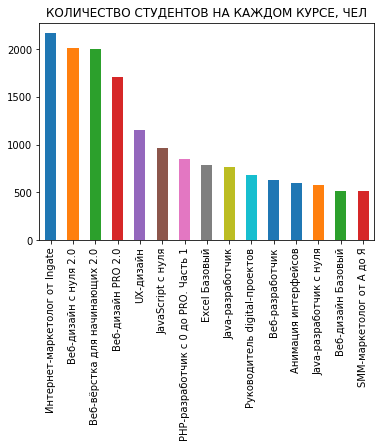

In [44]:
#students_mean.groupby('course_title')['id'].count()
# Строим bar-chart 
students_mean['course_title'].value_counts().plot.bar(
    title='КОЛИЧЕСТВО СТУДЕНТОВ НА КАЖДОМ КУРСЕ, ЧЕЛ'
);

Описание данных.

Основные выводы по первому этапу: 
1. Имеем общее количество курсов в количестве 15 штук. 
2. Каждый курс состоит из модулей, причем максимальное количество модулей замечено у 2-х курсов (20 шт.): Веб-разработчик и UX-дизайн. 
Минимальное количество модулей также у 2-х курсов (8 шт.): Веб-вёрстка для начинающих 2.0 и PHP-разработчик с 0 до PRO. Часть 1. 
В среднем на каждый курс приходится 15 модулей. 
3. Если рассматривать медианное количество уроков в модуле на каждом курсе, то ситуация будет следующая: наибольшее количество (10 шт.) у курса Java-разработчик c нуля, наименьшее (2 шт.) – у курса Веб-разработчик. 
4. Количество учеников на каждом курсе очень сильно варьируется: максимальное количество (2168 чел.) имеем на курсе Интернет-маркетолог от Ingate, минимальное (511 чел.) – на курсе SMM-маркетолог от А до Я. 
5. Минимальный возраст студента – 8 лет, максимальный возраст студента – 90 лет, средний возраст студентов – 28,6 лет, медианный возраст студентов – 28 лет. 
6. Основные моменты главных статистических показателей по возрасту студентов на каждом курсе: 

  минимальный возраст студента (13 лет) имеем на 6-ти курсах (Java-разработчик c нуля, JavaScript с нуля, PHP-разработчик с 0 до PRO. Часть 1, Веб-вёрстка для начинающих 2.0, Веб-дизайн с нуля 2.0, Веб-разработчик); 

  максимальный возраст студента (90 лет) имеем на одном курсе (Интернет-маркетолог от Ingate); 

  максимальное значение среднего возраста студентов (33,2 года) среди всех курсов имеем на курсе Excel Базовый, минимальное значение среднего возраста студентов (27,7 лет) среди всех курсов имеем на курсе Веб-разработчик; 

  максимальное значение медианного возраста студентов (33 года) среди всех курсов имеем на курсе Excel Базовый, минимальное значение медианного возраста студентов (27 лет) среди всех курсов имеем на 6-ти курсах (Веб-разработчик, Веб-дизайн с нуля 2.0, Веб-дизайн Базовый, Веб-дизайн PRO 2.0, Веб-вёрстка для начинающих 2.0, JavaScript с нуля).


## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
4. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [63]:
### YOUR CODE HERE ###

Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [45]:
# готовим общий датасет для расчета прироста студентов на кажд. курсе в кажд. месяце 
main_copy = main.copy()
main_copy.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [46]:
# удалим 'ненужные' колонки 
main_copy = main_copy.drop(['progress_id', 
                            'lesson_number', 
                            'status', 
                            'finish_date', 
                            'course_id', 
                            'course_field', 
                            'module_title', 
                            'lesson_token', 
                            'is_video'], axis=1)

main_copy.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
0,2,2018-06-23 08:28:50.681065+00,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Практика — мокапы,False
1,1,2018-06-20 14:25:21.783762+00,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Интро курса,False
2,2,2018-06-23 08:18:09.653771+00,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Что такое концептуальный дизайн,False
3,1,2018-06-20 16:00:06.36178+00,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Личное позиционирование,False
4,1,2018-06-21 19:10:36.957891+00,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Домашняя работа,True


In [47]:
# редактируем колонку 'start_date' 
main_copy['start_date'] = main_copy['start_date'].apply(lambda x: datetime.strptime(x[0:7], "%Y-%m"))
main_copy.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
0,2,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Практика — мокапы,False
1,1,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Интро курса,False
2,2,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Что такое концептуальный дизайн,False
3,1,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Личное позиционирование,False
4,1,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Домашняя работа,True


In [48]:
# список месяцев, всего 33 уник. мес.
main_copy['start_date'].unique()

array(['2018-06-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2017-02-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-04-01

In [49]:
# из датасета берем только 1-е модули, строки с ДЗ и подтверждение наличия ДЗ  
main_copy = main_copy[(main_copy['module_number'] == 1) & 
                      (main_copy['lesson_title'] == 'Домашняя работа') & 
                      (main_copy['is_homework'] == True)]

main_copy.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
4,1,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Домашняя работа,True
17,1,2018-02-01,f69e2707b7ba94d49ca03ea9ed52ea5d,Интернет-маркетолог от Ingate,Домашняя работа,True
82,1,2018-08-01,fcd7b6853c2582372980dd6af56d3bdc,Веб-дизайн с нуля 2.0,Домашняя работа,True
111,1,2019-02-01,84d2010cc192eb3b4d73477cca78845b,UX-дизайн,Домашняя работа,True
144,1,2018-07-01,3dac07629e8e0b23af6654f6deda91c4,Анимация интерфейсов,Домашняя работа,True


In [50]:
main_copy['course_title'].unique()

array(['Веб-дизайн PRO 2.0', 'Интернет-маркетолог от Ingate',
       'Веб-дизайн с нуля 2.0', 'UX-дизайн', 'Анимация интерфейсов',
       'Веб-разработчик', 'Руководитель digital-проектов',
       'Excel Базовый', 'SMM-маркетолог от А до Я', 'JavaScript с нуля',
       'Веб-вёрстка для начинающих 2.0',
       'PHP-разработчик с 0 до PRO. Часть 1', 'Java-разработчик',
       'Java-разработчик c нуля'], dtype=object)

In [51]:
# СТОП!!! куда пропал один курс??? Было 15! 
main_copy['course_title'].nunique()

14

In [52]:
# 'Веб-дизайн Базовый' отсутствует, видимо у него на 1-м модуле нет ДЗ
# А может на 2-м есть?))))) Или на 3-м?))) 
main['course_title'].unique()

array(['Веб-дизайн PRO 2.0', 'Интернет-маркетолог от Ingate', 'UX-дизайн',
       'JavaScript с нуля', 'Веб-дизайн с нуля 2.0', 'Веб-разработчик',
       'Анимация интерфейсов', 'Веб-вёрстка для начинающих 2.0',
       'Руководитель digital-проектов',
       'PHP-разработчик с 0 до PRO. Часть 1', 'Excel Базовый',
       'SMM-маркетолог от А до Я', 'Веб-дизайн Базовый',
       'Java-разработчик', 'Java-разработчик c нуля'], dtype=object)

In [53]:
# Надо бы исправить это недоразумение, и добавить инфу по "Базовому веб-дизайну"
main_copy_web_base = main[main['course_title'] == 'Веб-дизайн Базовый']
main_copy_web_base.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
776,6168c9bc4533ccd0311be6012bc8ef6f,3,1,done,2018-07-04 17:24:20.777751+00,2019-03-19 20:38:09.031003+00,221d1a839570cda580c9171a270d485d,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,Базовые знания о типографике. Практика Photoshop,Урок. Базовые знания о типографике,2adfc9cd-701a-46e8-86b8-d185999a6e5f,True,False
777,6168c9bc4533ccd0311be6012bc8ef6f,2,3,done,2018-07-04 13:39:29.131326+00,2018-07-04 17:24:20.584872+00,221d1a839570cda580c9171a270d485d,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,Цели сайта и цели дизайнера,Чувство вкуса. Вдохновение.,f009ef20-4b66-4021-983e-bc02fc7302f8,True,False
778,6168c9bc4533ccd0311be6012bc8ef6f,1,5,done,2018-05-16 17:12:39.155699+00,2018-05-19 15:49:15.822339+00,221d1a839570cda580c9171a270d485d,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,Интерфейс. Практика Photoshop,Работа со слоями,26824011-be09-4c82-8512-22c0ce4308b5,True,False
779,6168c9bc4533ccd0311be6012bc8ef6f,1,4,done,2018-05-15 18:27:23.470302+00,2018-05-16 17:12:38.889799+00,221d1a839570cda580c9171a270d485d,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,Интерфейс. Практика Photoshop,Color Picker,b66138ae-1104-41eb-b5c6-39d102f75c1f,True,False
780,6168c9bc4533ccd0311be6012bc8ef6f,1,8,done,2018-06-11 17:57:36.541435+00,2018-06-11 18:12:33.11741+00,221d1a839570cda580c9171a270d485d,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design,Интерфейс. Практика Photoshop,Сохранение документов,32ec042d-6cf8-4b72-a6d7-4d6f2572df53,True,False


In [54]:
# удалим "ненужные" столбцы
main_copy_web_base = main_copy_web_base.drop(['progress_id', 
                                              'lesson_number', 
                                              'status', 
                                              'finish_date', 
                                              'course_id', 
                                              'course_field', 
                                              'module_title', 
                                              'lesson_token', 
                                              'is_video'], axis=1)

main_copy_web_base.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
776,3,2018-07-04 17:24:20.777751+00,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Урок. Базовые знания о типографике,False
777,2,2018-07-04 13:39:29.131326+00,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Чувство вкуса. Вдохновение.,False
778,1,2018-05-16 17:12:39.155699+00,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Работа со слоями,False
779,1,2018-05-15 18:27:23.470302+00,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Color Picker,False
780,1,2018-06-11 17:57:36.541435+00,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Сохранение документов,False


In [55]:
# выберем только ДЗ 
main_copy_web_base = main_copy_web_base[main_copy_web_base['lesson_title'] == 'Домашняя работа']
main_copy_web_base.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
784,3,2019-04-28 10:45:24.487294+00,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Домашняя работа,True
933,5,2018-12-17 06:16:31.294857+00,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
942,6,2019-01-25 12:03:51.049906+00,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
948,3,2018-08-19 22:40:22.632522+00,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
949,7,2019-03-04 15:54:28.495924+00,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True


In [56]:
# эврика! первая домашняя работа начинается на 3 уроке
main_copy_web_base['module_number'].unique()

array([ 3,  5,  6,  7,  8, 11,  9, 10, 13, 12, 14], dtype=int64)

In [57]:
# редактируем колонку 'start_date' по "Базовому веб-дизайну" 
main_copy_web_base['start_date'] = main_copy_web_base['start_date'].apply(
    lambda x: datetime.strptime(x[0:7], "%Y-%m"))
main_copy_web_base.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
784,3,2019-04-01,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Домашняя работа,True
933,5,2018-12-01,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
942,6,2019-01-01,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
948,3,2018-08-01,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
949,7,2019-03-01,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True


In [58]:
# выберем 3-е модули и подтверждение наличия ДЗ 
main_copy_web_base = main_copy_web_base[(main_copy_web_base[
    'module_number'] == 3) & (main_copy_web_base['is_homework'] == True)]

main_copy_web_base.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
784,3,2019-04-01,221d1a839570cda580c9171a270d485d,Веб-дизайн Базовый,Домашняя работа,True
948,3,2018-08-01,7b427cf5031b3aabe7957d3e0dd7bd57,Веб-дизайн Базовый,Домашняя работа,True
1147,3,2018-08-01,12e8d4153463f7f986697efca161c332,Веб-дизайн Базовый,Домашняя работа,True
1858,3,2018-07-01,01ab08f9a92950c8515629091ef5e109,Веб-дизайн Базовый,Домашняя работа,True
1908,3,2018-06-01,125f9c1b4b5da2e62f8d21b0a2f1fbaf,Веб-дизайн Базовый,Домашняя работа,True


In [59]:
# объединим 2 датасета в один, тот в котором будет 15 курсов для корректн. решения задачи 
main_copy = pd.concat([main_copy, main_copy_web_base])
main_copy.head()

,module_number,start_date,student_id,course_title,lesson_title,is_homework
4,1,2018-06-01,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Домашняя работа,True
17,1,2018-02-01,f69e2707b7ba94d49ca03ea9ed52ea5d,Интернет-маркетолог от Ingate,Домашняя работа,True
82,1,2018-08-01,fcd7b6853c2582372980dd6af56d3bdc,Веб-дизайн с нуля 2.0,Домашняя работа,True
111,1,2019-02-01,84d2010cc192eb3b4d73477cca78845b,UX-дизайн,Домашняя работа,True
144,1,2018-07-01,3dac07629e8e0b23af6654f6deda91c4,Анимация интерфейсов,Домашняя работа,True


In [60]:
# Списки "рабочих" месяцев, включая не упомянутые, для каждого курса 
for i in main_copy['course_title'].unique():
    print(i)
    print(pd.date_range(main_copy[main_copy[
         'course_title'] == i].start_date.min(), 
                  main_copy[main_copy[
         'course_title'] == i].start_date.max(), freq='MS'))
    print('----------')

Веб-дизайн PRO 2.0
DatetimeIndex(['2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', freq='MS')
----------
Интернет-маркетолог от Ingate
DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', freq='MS')
----------
Веб-дизайн с нуля 2.0
DatetimeIndex(['2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01

In [61]:
""" 1. Самый внутренний apply превращает каждую строку в series. 
    2. Внешний собирает их все по курсам. 
    3. Строим сводную таблицу, заполняем возможные пропуски индекса. """

piv_table = main_copy.groupby('course_title').apply(lambda course: course.apply(
    lambda x: pd.Series(1, index=pd.date_range(
        x['start_date'], x['start_date'], closed=None, freq='MS')), axis=1).sum(
    axis=0)).reset_index(level=0).pivot(
    columns='course_title', values=0).reindex(pd.date_range(
    main_copy.start_date.min(), 
    main_copy.start_date.max(), 
    freq='MS'), fill_value=0).reset_index().fillna(0)

# переименуем колонку с месяцами
piv_table.rename(columns={'index': 'month'}, inplace=True)

# обрежем номер дня до месяца и года 
piv_table['month'] = piv_table['month'].apply(lambda x: str(x)[0:7])

# прирост студентов на каждом курсе в каждом месяце за всю историю (15 курсов) 
piv_table

course_title,month,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
0,2016-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2016-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-11,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

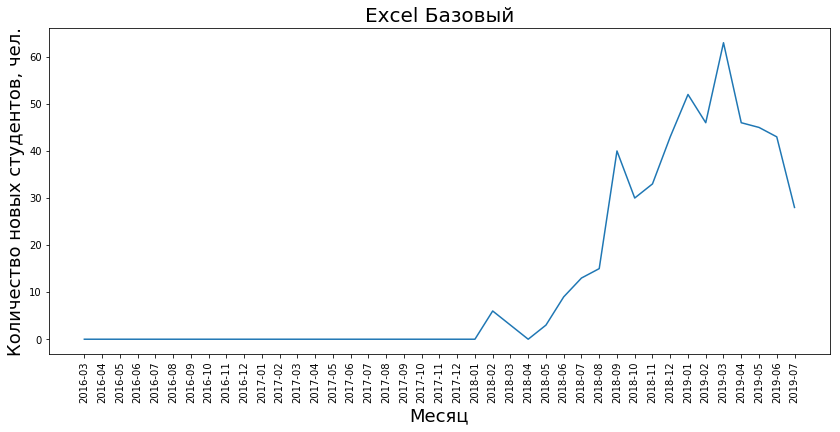

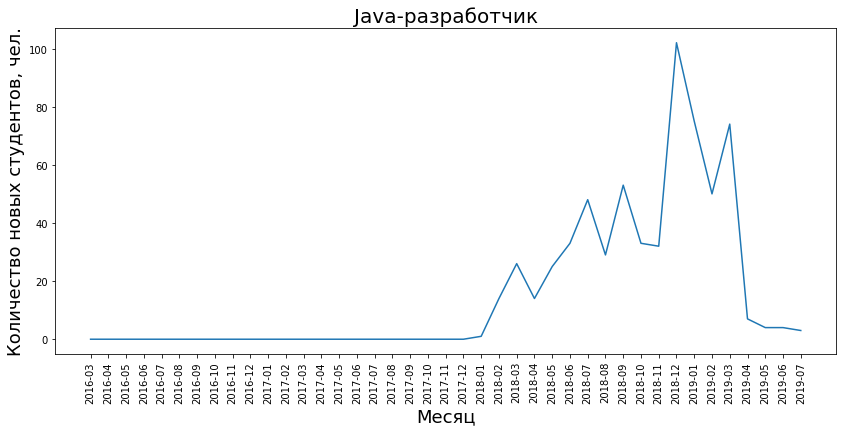

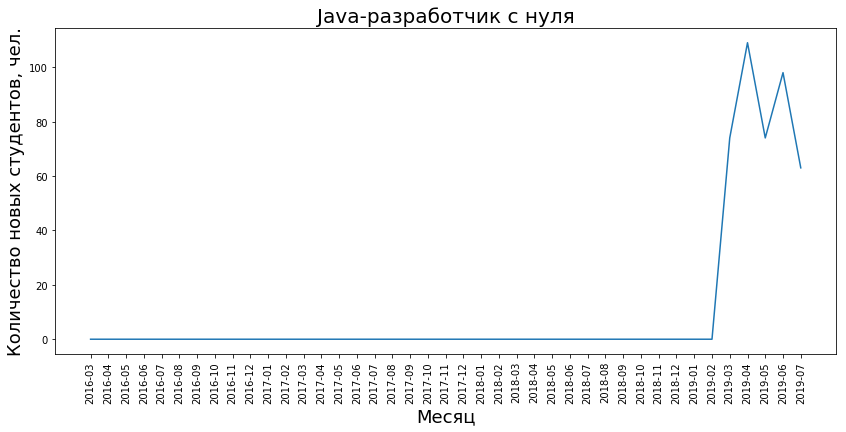

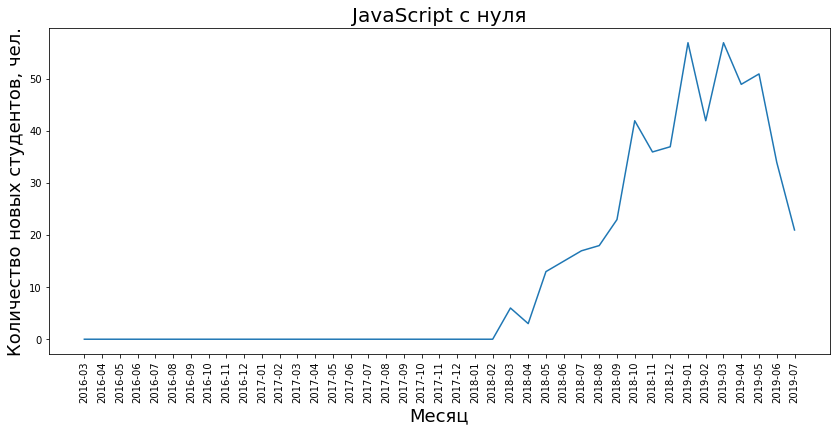

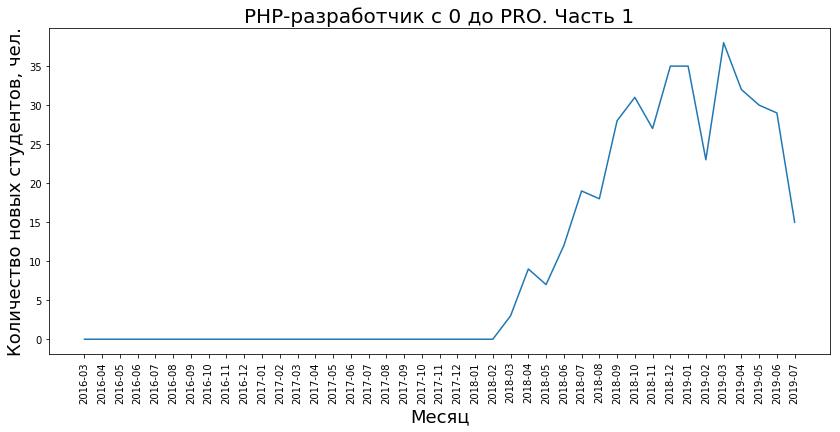

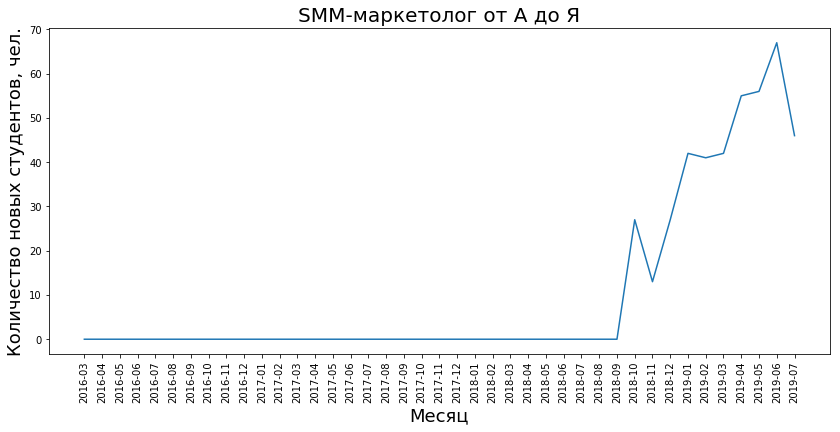

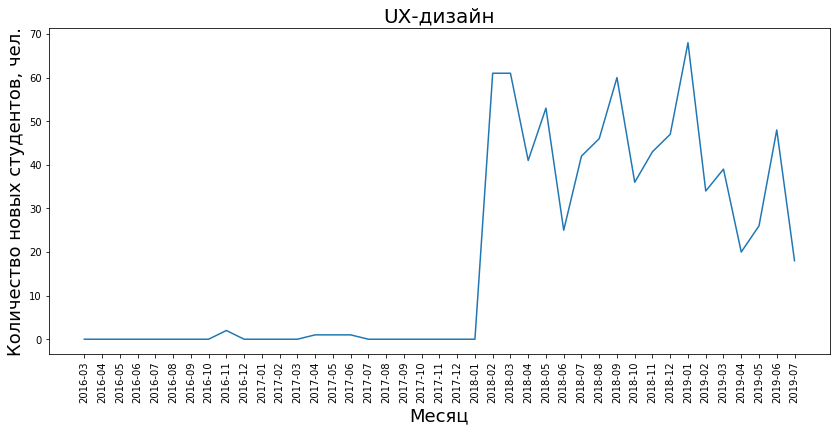

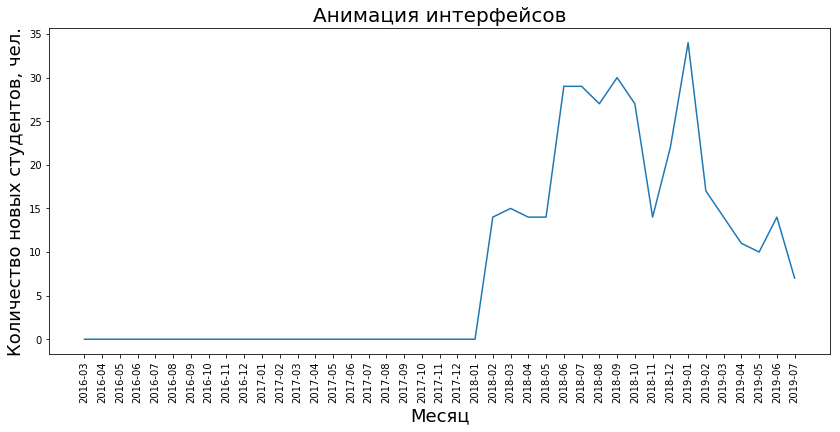

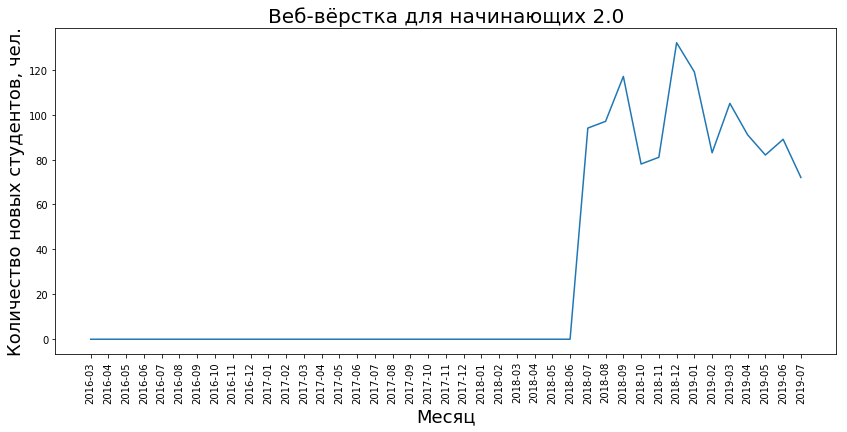

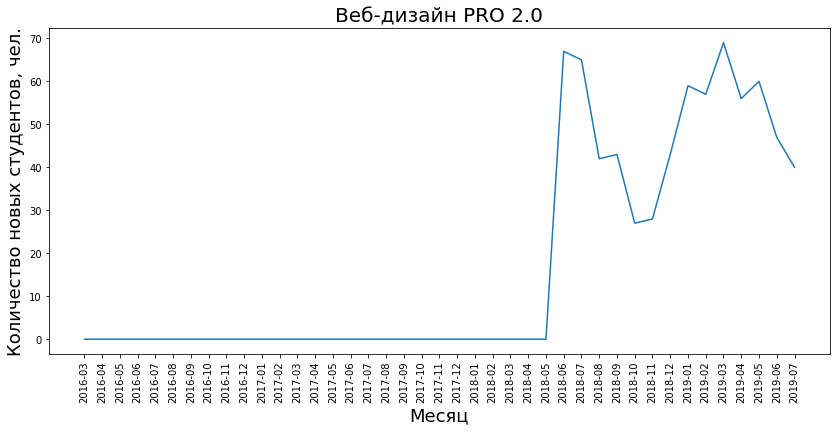

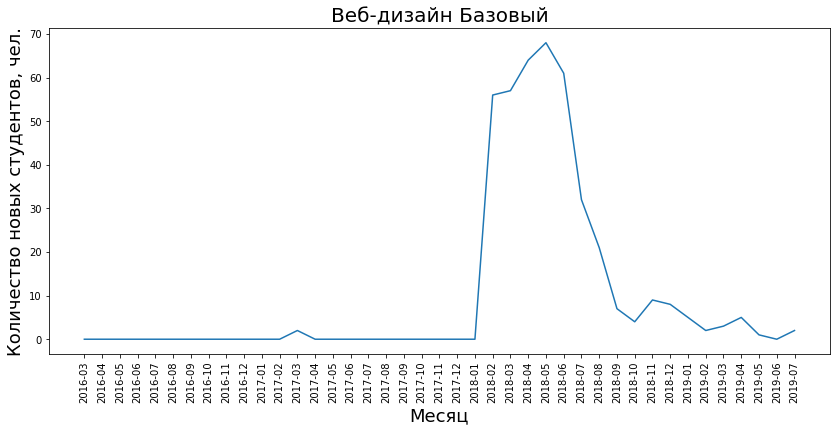

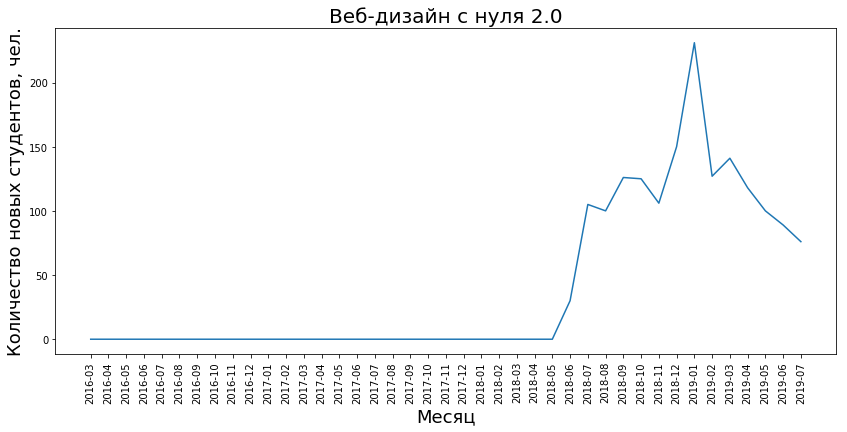

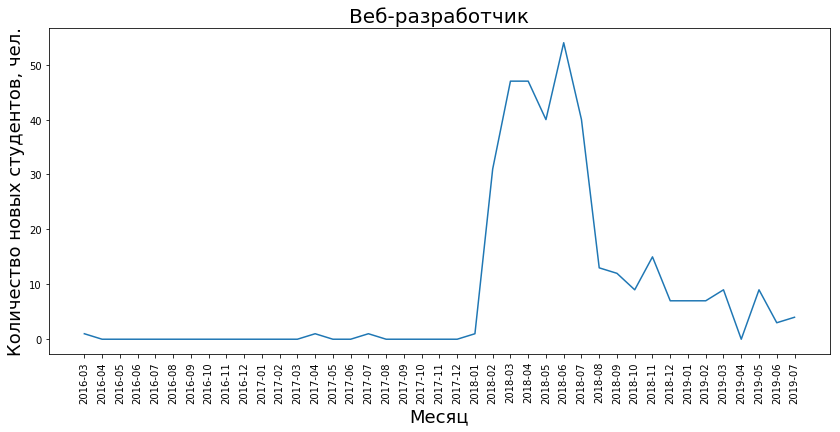

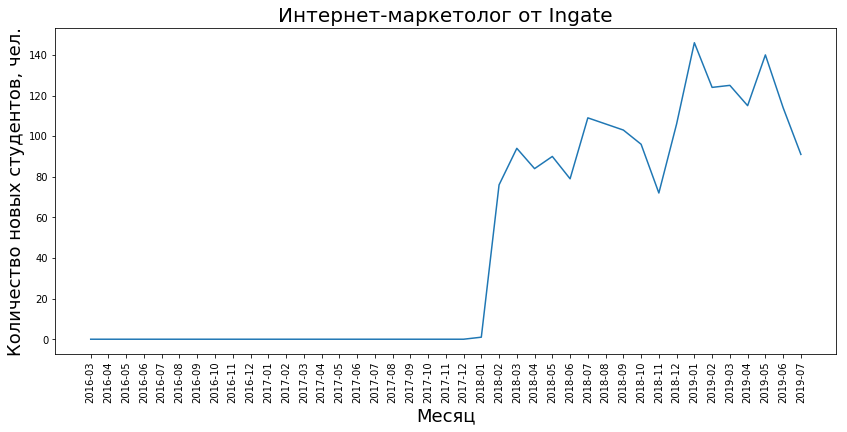

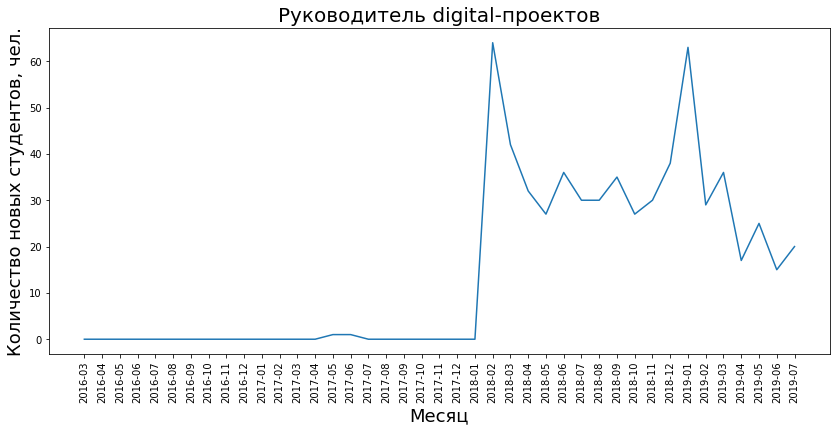

In [62]:
# Строим 15 line-graph с приростом студентов в каждом мес. для кажд. курса (line-chart)
our_list = piv_table.columns.tolist()[1:]

# Строим 15 графиков 
for course in our_list:
    plt.figure(figsize = (14, 6))
    plt.plot(piv_table['month'].unique(), piv_table[course].values)
    plt.title(course, fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel('Месяц', fontsize=18)
    plt.ylabel('Количество новых студентов, чел.', fontsize=18)
    plt.show()

Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [63]:
# готовим общий датасет для расчета количества прогрессов по выполнению ДЗ в кажд. мес. 
main_copy_pr = main.copy()
main_copy_pr.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [64]:
# удалим 'ненужные' колонки 
main_copy_pr = main_copy_pr.drop(['module_number', 
                                  'lesson_number', 
                                  'student_id', 
                                  'course_id', 
                                  'course_field', 
                                  'module_title', 
                                  'lesson_token', 
                                  'is_video'], axis=1)

main_copy_pr.head()

,progress_id,status,start_date,finish_date,course_title,lesson_title,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,Веб-дизайн PRO 2.0,Практика — мокапы,False
1,a387ab916f402cb3fbfffd29f68fd0ce,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,Веб-дизайн PRO 2.0,Интро курса,False
2,a387ab916f402cb3fbfffd29f68fd0ce,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,Веб-дизайн PRO 2.0,Что такое концептуальный дизайн,False
3,a387ab916f402cb3fbfffd29f68fd0ce,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,Веб-дизайн PRO 2.0,Личное позиционирование,False
4,a387ab916f402cb3fbfffd29f68fd0ce,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,Веб-дизайн PRO 2.0,Домашняя работа,True


In [65]:
# выбираем статус 'done' (выполнено), 'название урока' (ДЗ), is_homework = True  
main_copy_pr = main_copy_pr[(main_copy_pr['status'] == 'done') & 
                            (main_copy_pr['lesson_title'] == 'Домашняя работа') & 
                            (main_copy_pr['is_homework'] == True)]

main_copy_pr.head()

,progress_id,status,start_date,finish_date,course_title,lesson_title,is_homework
4,a387ab916f402cb3fbfffd29f68fd0ce,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,Веб-дизайн PRO 2.0,Домашняя работа,True
17,a97393fe164b448e7231c07d48c82f9e,done,2018-02-19 12:30:34.638431+00,2018-02-20 09:16:50.297369+00,Интернет-маркетолог от Ingate,Домашняя работа,True
29,000962791295398b5ec7bc24f05269ac,done,2018-10-02 19:41:04.983571+00,2018-10-05 17:02:51.913911+00,Веб-дизайн с нуля 2.0,Домашняя работа,True
37,000962791295398b5ec7bc24f05269ac,done,2019-01-14 15:59:10.737967+00,2019-01-23 06:22:01.837609+00,Веб-дизайн с нуля 2.0,Домашняя работа,True
38,000962791295398b5ec7bc24f05269ac,done,2018-10-09 20:23:30.413974+00,2019-01-17 08:27:10.791105+00,Веб-дизайн с нуля 2.0,Домашняя работа,True


In [66]:
# удалим 'ненужные' колонки, которые сделали свое дело
main_copy_pr = main_copy_pr.drop(['status', 
                                  'lesson_title', 
                                  'is_homework'], axis=1)

main_copy_pr.head()

,progress_id,start_date,finish_date,course_title
4,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,Веб-дизайн PRO 2.0
17,a97393fe164b448e7231c07d48c82f9e,2018-02-19 12:30:34.638431+00,2018-02-20 09:16:50.297369+00,Интернет-маркетолог от Ingate
29,000962791295398b5ec7bc24f05269ac,2018-10-02 19:41:04.983571+00,2018-10-05 17:02:51.913911+00,Веб-дизайн с нуля 2.0
37,000962791295398b5ec7bc24f05269ac,2019-01-14 15:59:10.737967+00,2019-01-23 06:22:01.837609+00,Веб-дизайн с нуля 2.0
38,000962791295398b5ec7bc24f05269ac,2018-10-09 20:23:30.413974+00,2019-01-17 08:27:10.791105+00,Веб-дизайн с нуля 2.0


In [67]:
# сократим стартовые и финишные даты для удобства
main_copy_pr['start_date'] = main_copy_pr['start_date'].apply(
    lambda x: datetime.strptime(x[0:7], "%Y-%m"))

main_copy_pr['finish_date'] = main_copy_pr['finish_date'].apply(
    lambda x: datetime.strptime(x[0:7], "%Y-%m"))

main_copy_pr.head()

,progress_id,start_date,finish_date,course_title
4,a387ab916f402cb3fbfffd29f68fd0ce,2018-06-01,2018-06-01,Веб-дизайн PRO 2.0
17,a97393fe164b448e7231c07d48c82f9e,2018-02-01,2018-02-01,Интернет-маркетолог от Ingate
29,000962791295398b5ec7bc24f05269ac,2018-10-01,2018-10-01,Веб-дизайн с нуля 2.0
37,000962791295398b5ec7bc24f05269ac,2019-01-01,2019-01-01,Веб-дизайн с нуля 2.0
38,000962791295398b5ec7bc24f05269ac,2018-10-01,2019-01-01,Веб-дизайн с нуля 2.0


In [68]:
"""1. Самый внутренний apply превращает каждую строку в series. 
   2. Внешний собирает их все по курсам. 
   3. Строим сводную таблицу, в последней строке заполняем возможные пропуски индекса."""
pivot_table = main_copy_pr.groupby('course_title').apply(lambda course: course.apply(
    lambda x: pd.Series(1, index=pd.date_range(
        x['start_date'], x['finish_date'], closed=None, freq='MS')), axis=1).sum(
    axis=0)).reset_index(level=0).pivot(
    columns='course_title', values=0).reindex(pd.date_range(
    main_copy_pr.start_date.min(), 
    main_copy_pr.finish_date.max(), 
    freq='MS'), fill_value=0).reset_index() 

pivot_table

course_title,index,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
0,2016-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,2016-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# заполним все пропущенные значения нулем
pivot_table = pivot_table.fillna(0)

# переименуем колонку с месяцами 
pivot_table.rename(columns={'index': 'month'}, inplace=True)

# обрежем номер дня 
pivot_table['month'] = pivot_table['month'].apply(lambda x: str(x)[0:7])

In [70]:
""" Количество прогрессов по выполнению ДЗ в каждом месяце за всю историю 
(каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. 
Учтено, что выполнение ДЗ перетекает из одного месяца в другой 
(такие ДЗ включены в общее число прогрессов для всех месяцев, 
которые покрывает срок выполнения этих ДЗ) """  
pivot_table

course_title,month,Excel Базовый,Java-разработчик,Java-разработчик c нуля,JavaScript с нуля,PHP-разработчик с 0 до PRO. Часть 1,SMM-маркетолог от А до Я,UX-дизайн,Анимация интерфейсов,Веб-вёрстка для начинающих 2.0,Веб-дизайн PRO 2.0,Веб-дизайн Базовый,Веб-дизайн с нуля 2.0,Веб-разработчик,Интернет-маркетолог от Ingate,Руководитель digital-проектов
0,2016-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1,2016-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2016-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2016-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2016-11,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2016-12,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

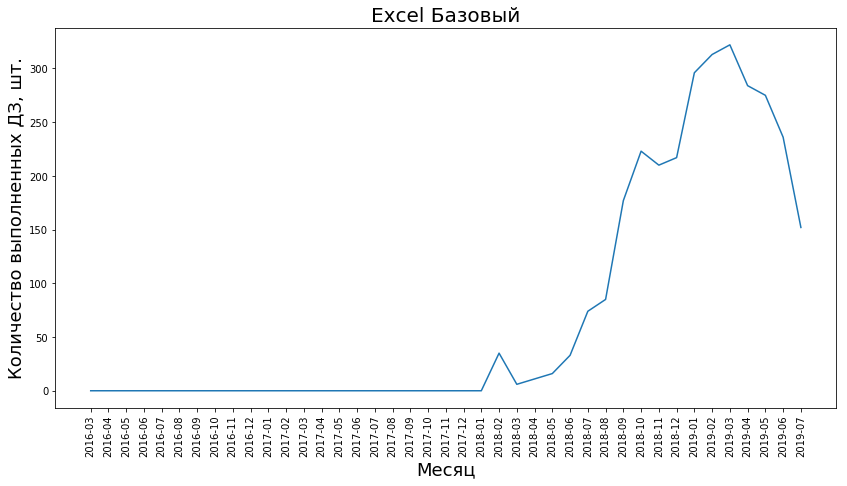

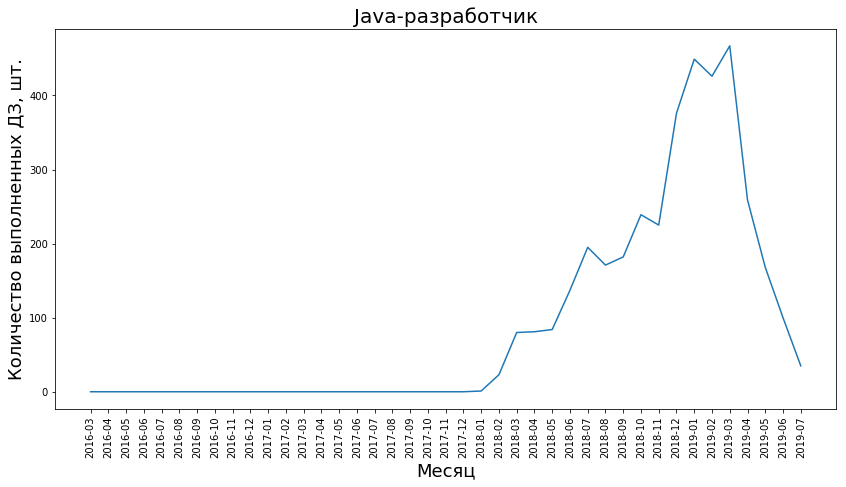

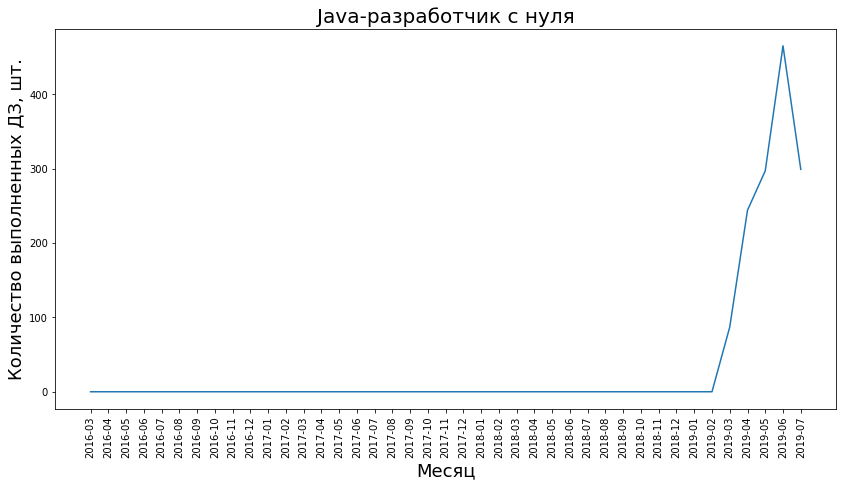

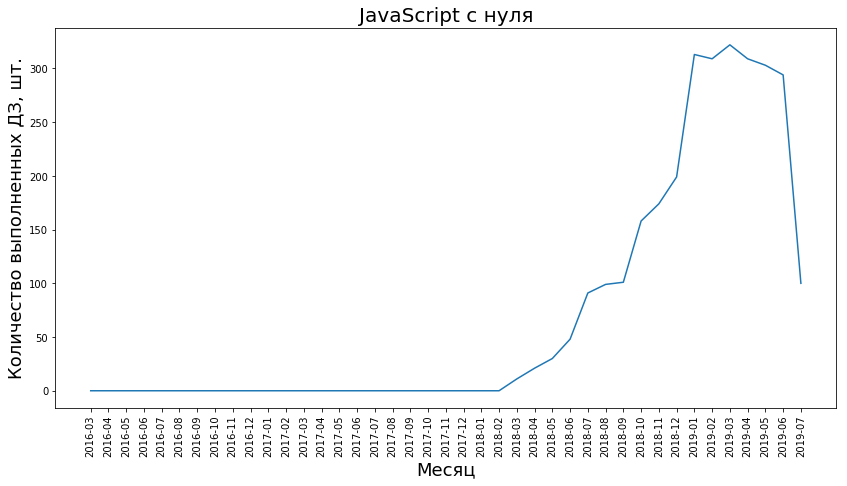

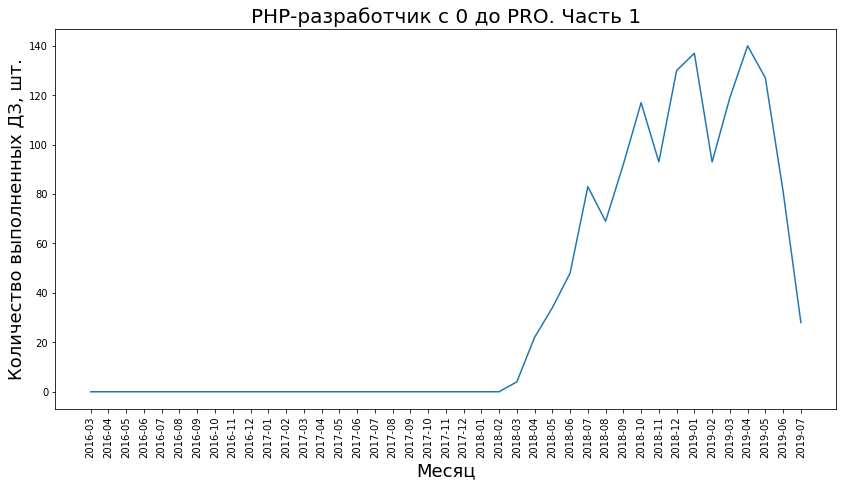

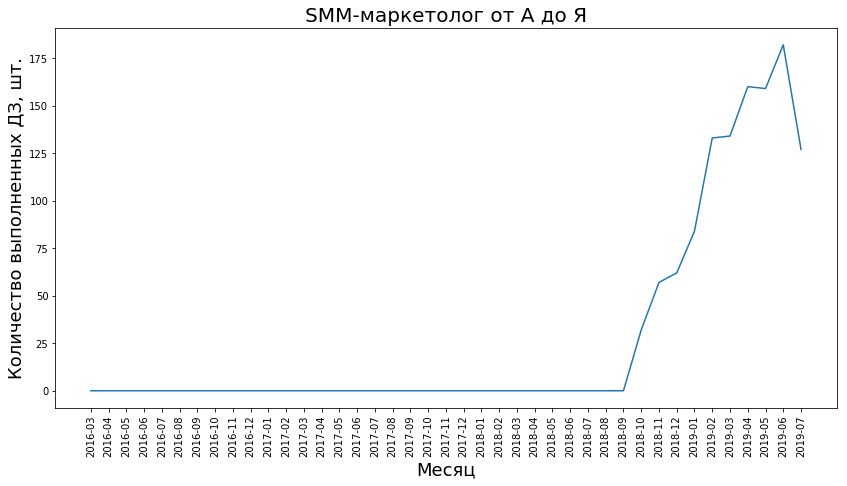

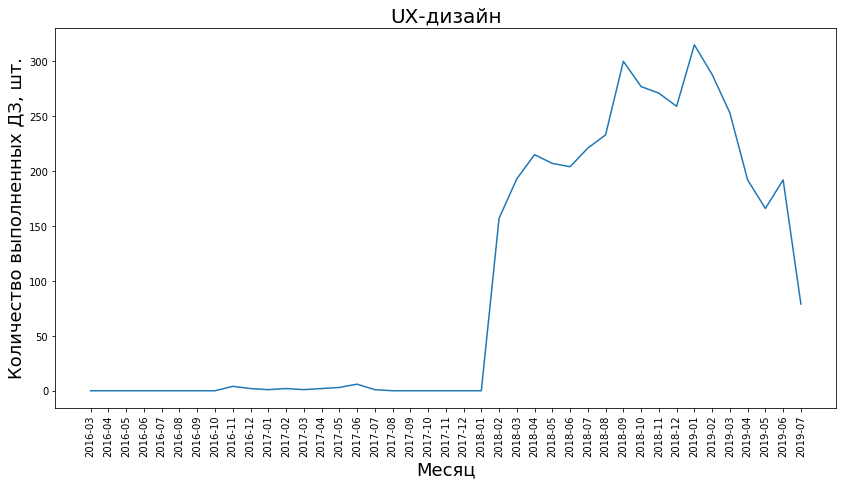

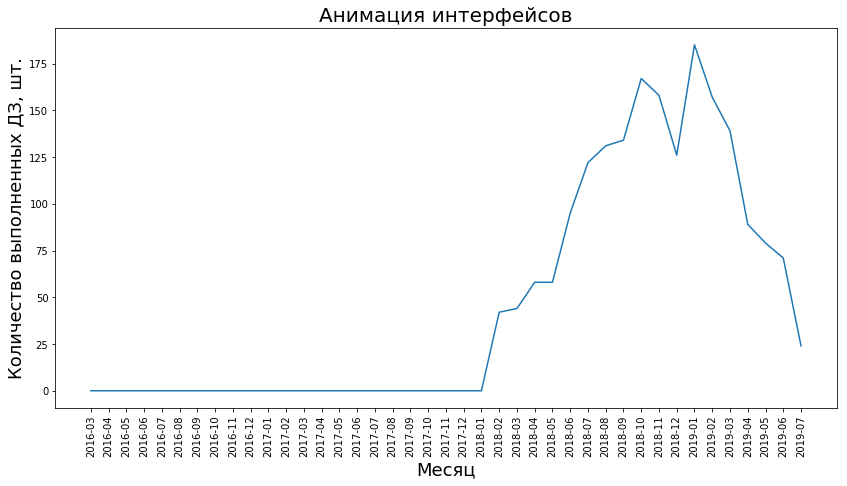

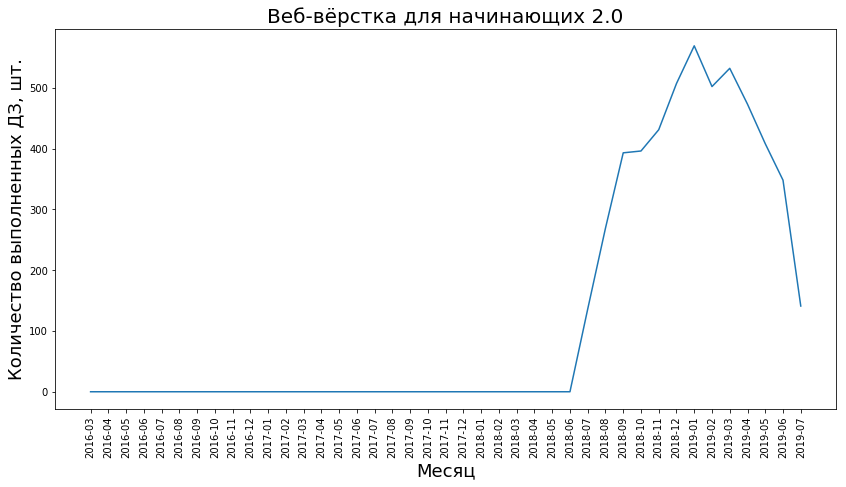

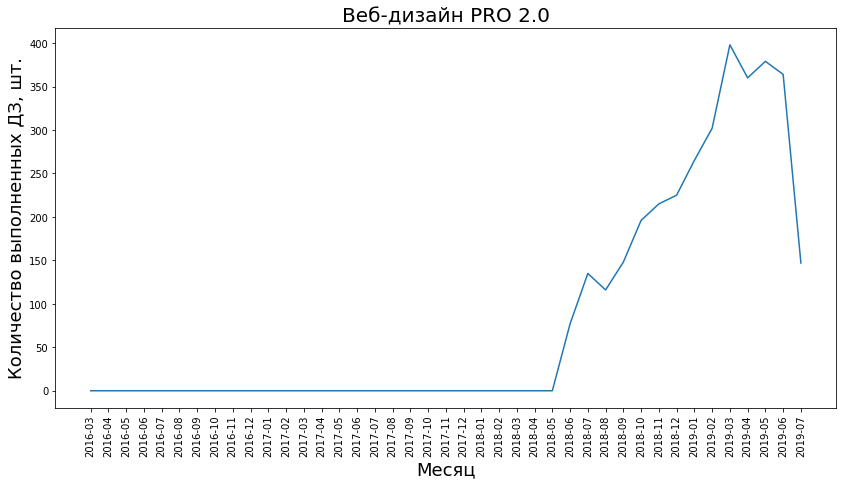

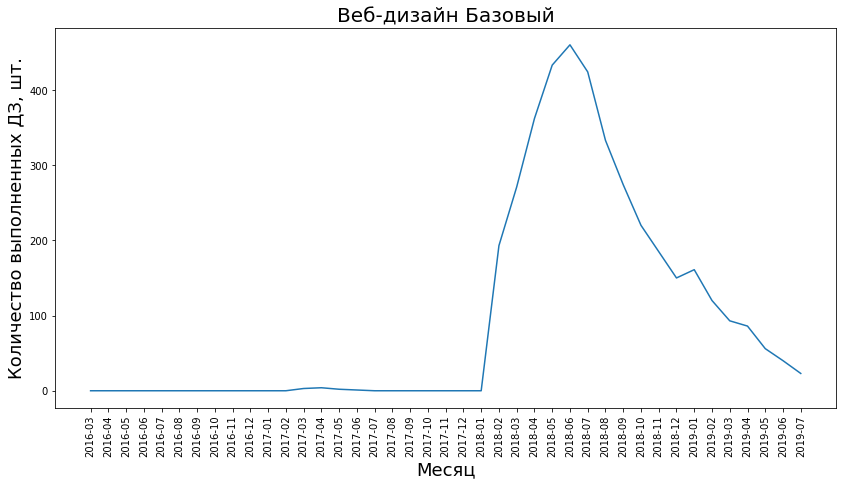

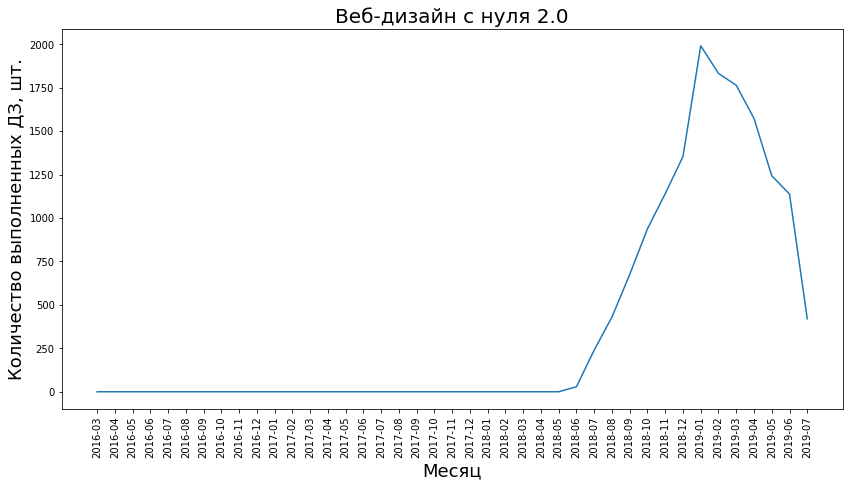

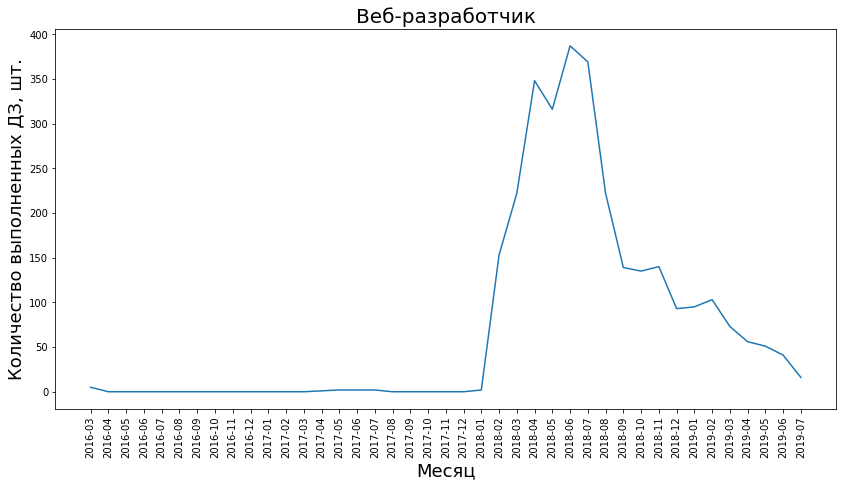

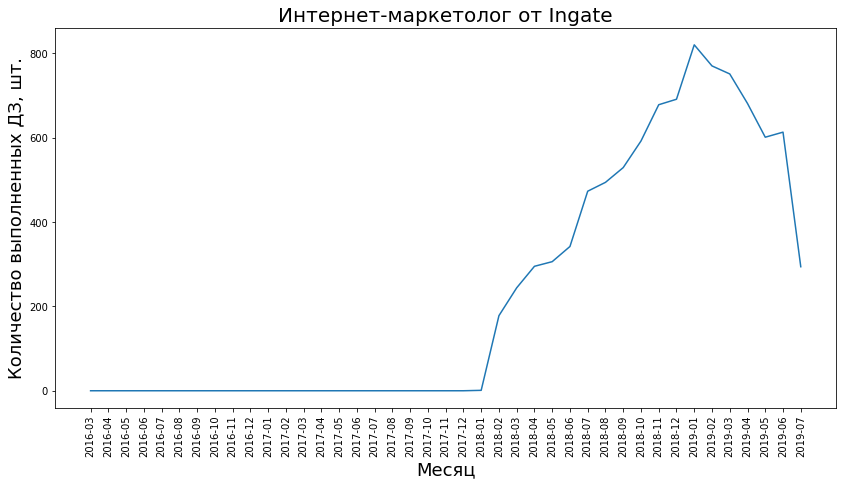

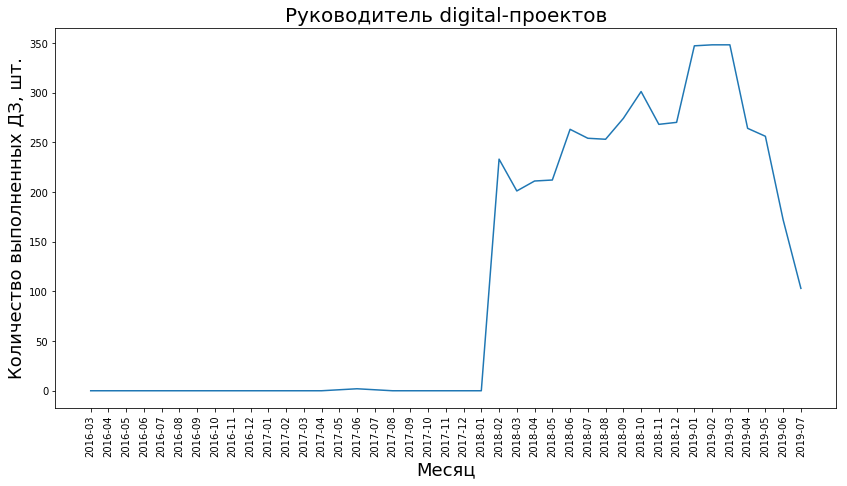

In [71]:
# список курсов 
list_of_courses = pivot_table.columns.tolist()[1:]

# Строим 15 графиков 
for course in list_of_courses:
    plt.figure(figsize = (14, 7))
    plt.plot(pivot_table['month'].unique(), pivot_table[course].values)
    plt.title(course, fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel('Месяц', fontsize=18)
    plt.ylabel('Количество выполненных ДЗ, шт.', fontsize=18)
    plt.show()

Описание данных.

Основные выводы по 2-му этапу: 

1. Исходя из полученных 15 графиков по приросту студентов в каждом месяце на каждом курсе можно сказать, что: 

 - максимальный прирост новых студентов приходится на январь 2019 года (6 курсов), март 2019 года (3 курса) и декабрь 2018 года (3 курса). Это может быть связано с предновогодними (январь 2019, декабрь 2018) и сезонными (март 2019) распродажами курсов; 

 - в основном, минимальный прирост новых студентов приходится на первые 2-3 месяца запуска (11 курсов), что вполне ожидаемо. Помимо этого минимальный прирост также наблюдается и по 2-м временным группам (октябрь-ноябрь 2018 года - 6 курсов, июнь-июль 2019 года - 5 курсов). 
  
  
 2. Исходя из полученных 15 графиков по количеству прогрессов выполнения домашних работ в каждом месяце для каждого курса стоит выделить следующее: 
 
  - почти на всех курсах имеем "плато" с марта 2016 по декабрь 2017, т.е. либо полное отсутствие данных по выполненным домашним заданиям, либо количество выполненных домашних заданий меньше 10; 
 
  - наблюдаем 2 ярко выраженных периода, у которых имеется наибольшее количество выполненных домашних заданий (первый квартал 2019 года для 7-и курсов и март-май 2019 года для 4-х курсов). Можно сделать вывод, что именно в эти временные диапазоны у преподавателей была максимальная нагрузка. 

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [47]:
### YOUR CODE HERE ###

Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [48]:
# готовим общий датасет для расчета min, max, mean, median времени прохождения кажд. модуля 
main_copy_mod = main.copy()
main_copy_mod.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [49]:
# удалим "лишние колонки" 
main_copy_mod = main_copy_mod.drop(['student_id', 
                                    'course_id', 
                                    'course_field', 
                                    'lesson_token', 
                                    'is_video'], axis=1)

# нам нужны только выполненные ДЗ-шки с подтверждением наличия ДЗ 
main_copy_mod = main_copy_mod[(main_copy_mod['status'] == 'done') &  
                              (main_copy_mod['is_homework'] == True)]

main_copy_mod.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,course_title,module_title,lesson_title,is_homework
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,Домашняя работа,True
17,a97393fe164b448e7231c07d48c82f9e,1,7,done,2018-02-19 12:30:34.638431+00,2018-02-20 09:16:50.297369+00,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,True
29,000962791295398b5ec7bc24f05269ac,7,5,done,2018-10-02 19:41:04.983571+00,2018-10-05 17:02:51.913911+00,Веб-дизайн с нуля 2.0,Основы работы с графикой,Домашняя работа,True
37,000962791295398b5ec7bc24f05269ac,13,6,done,2019-01-14 15:59:10.737967+00,2019-01-23 06:22:01.837609+00,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,Домашняя работа,True
38,000962791295398b5ec7bc24f05269ac,12,5,done,2018-10-09 20:23:30.413974+00,2019-01-17 08:27:10.791105+00,Веб-дизайн с нуля 2.0,Формы и кнопки,Домашняя работа,True


In [50]:
# удалим колонки чтобы не мешали, они сделали свое дело
main_copy_mod = main_copy_mod.drop(['status', 
                                    'lesson_title', 
                                    'is_homework'], axis=1)

main_copy_mod.head()

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,Веб-дизайн PRO 2.0,Специализация и личное позиционирование
17,a97393fe164b448e7231c07d48c82f9e,1,7,2018-02-19 12:30:34.638431+00,2018-02-20 09:16:50.297369+00,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен..."
29,000962791295398b5ec7bc24f05269ac,7,5,2018-10-02 19:41:04.983571+00,2018-10-05 17:02:51.913911+00,Веб-дизайн с нуля 2.0,Основы работы с графикой
37,000962791295398b5ec7bc24f05269ac,13,6,2019-01-14 15:59:10.737967+00,2019-01-23 06:22:01.837609+00,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия
38,000962791295398b5ec7bc24f05269ac,12,5,2018-10-09 20:23:30.413974+00,2019-01-17 08:27:10.791105+00,Веб-дизайн с нуля 2.0,Формы и кнопки


In [51]:
# выявим наличие нескольких домашних заданий в одном модуле на каждом курсе 
for course in main_copy_mod['course_title'].unique():
    print(course)
    print(main_copy_mod[main_copy_mod[
    'course_title'] == course].groupby('module_number')[
        'lesson_number'].nunique())
    print('----------')

Веб-дизайн PRO 2.0
module_number
1     1
2     1
4     2
5     1
6     1
7     1
9     1
10    1
12    1
13    1
14    1
15    1
16    1
Name: lesson_number, dtype: int64
----------
Интернет-маркетолог от Ingate
module_number
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
Name: lesson_number, dtype: int64
----------
Веб-дизайн с нуля 2.0
module_number
1     1
3     1
4     1
5     1
7     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: lesson_number, dtype: int64
----------
UX-дизайн
module_number
1     1
2     1
3     1
4     1
6     1
7     1
9     2
11    1
13    1
19    1
20    1
Name: lesson_number, dtype: int64
----------
Руководитель digital-проектов
module_number
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
Name: lesson_number, dtype: int64
----------
Ан

In [22]:
# В курсе "Java-разработчик c нуля" есть 6 модулей (4, 5, 6, 7, 8, 9), 
# в каждом из которых несколько ДЗ: 
# 4-й - 6 ДЗ 
# 5-й - 5 ДЗ 
# 6-й - 4 ДЗ 
# 7-й - 2 ДЗ 
# 8-й - 3 ДЗ 
# 9-й - 5 ДЗ 

# В курсе "Веб-дизайн PRO 2.0" есть 1 модуль (4-й), у которого 2 ДЗ

# В курсе "UX-дизайн" есть 1 модуль (9-й), у которого 2 ДЗ

In [52]:
# Из датасета выберем курс "Java-разработчик c нуля"
main_copy_mod_jav = main_copy_mod[main_copy_mod['course_title'] == 'Java-разработчик c нуля']

###########################
# Из датасета выберем курс "Веб-дизайн PRO 2.0"
main_copy_mod_wd2 = main_copy_mod[main_copy_mod['course_title'] == 'Веб-дизайн PRO 2.0']

# Из датасета выберем курс "UX-дизайн"
main_copy_mod_ux = main_copy_mod[main_copy_mod['course_title'] == 'UX-дизайн']

In [53]:
# выберем 4-й модуль "Java-разработчик c нуля"
main_copy_mod_j4 = main_copy_mod_jav[(main_copy_mod_jav['module_number'] == 4)]

# выберем 5-й модуль "Java-разработчик c нуля"
main_copy_mod_j5 = main_copy_mod_jav[(main_copy_mod_jav['module_number'] == 5)]

# выберем 6-й модуль "Java-разработчик c нуля"
main_copy_mod_j6 = main_copy_mod_jav[(main_copy_mod_jav['module_number'] == 6)]

# выберем 7-й модуль "Java-разработчик c нуля"
main_copy_mod_j7 = main_copy_mod_jav[(main_copy_mod_jav['module_number'] == 7)]

# выберем 8-й модуль "Java-разработчик c нуля"
main_copy_mod_j8 = main_copy_mod_jav[(main_copy_mod_jav['module_number'] == 8)]

# выберем 9-й модуль "Java-разработчик c нуля"
main_copy_mod_j9 = main_copy_mod_jav[(main_copy_mod_jav['module_number'] == 9)]

###################
# выберем 4-й модуль "Веб-дизайн PRO 2.0"
main_copy_mod_wd2_4 = main_copy_mod_wd2[(main_copy_mod_wd2['module_number'] == 4)]

# выберем 9-й модуль "UX-дизайн"
main_copy_mod_ux_9 = main_copy_mod_ux[(main_copy_mod_ux['module_number'] == 9)]

In [54]:
# уберем последовательно из датасета ТОЛЬКО те модули, где больше одного ДЗ на модуль

# минус 4 модуль "Java-разработчик c нуля"
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Java-разработчик c нуля') & 
    (main_copy_mod['module_number'] == 4)].index)

# минус 5 модуль "Java-разработчик c нуля"
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Java-разработчик c нуля') & 
    (main_copy_mod['module_number'] == 5)].index)

# минус 6 модуль "Java-разработчик c нуля"
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Java-разработчик c нуля') & 
    (main_copy_mod['module_number'] == 6)].index)

# минус 7 модуль "Java-разработчик c нуля"
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Java-разработчик c нуля') & 
    (main_copy_mod['module_number'] == 7)].index)

# минус 8 модуль "Java-разработчик c нуля"
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Java-разработчик c нуля') & 
    (main_copy_mod['module_number'] == 8)].index)

# минус 9 модуль "Java-разработчик c нуля"
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Java-разработчик c нуля') & 
    (main_copy_mod['module_number'] == 9)].index)

####################
# минус 4 модуль "Веб-дизайн PRO 2.0" 
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'Веб-дизайн PRO 2.0') & 
    (main_copy_mod['module_number'] == 4)].index)

# минус 9 модуль "UX-дизайн" 
main_copy_mod = main_copy_mod.drop(main_copy_mod[(
    main_copy_mod['course_title'] == 'UX-дизайн') & 
    (main_copy_mod['module_number'] == 9)].index)

In [55]:
############################
# Добавление колонки "время прохождения модуля" в "Java-разработчик c нуля" с 4-м модулем: 
# 1. первое и последнее ДЗ в модуле
main_copy_mod_j4['lesson_number'].unique()

array([25,  6, 17, 13, 21, 27], dtype=int64)

In [56]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_j4['start_date'] = main_copy_mod_j4['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_j4['finish_date'] = main_copy_mod_j4['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list0_4 = []
# для каждого прогресса 
for i in main_copy_mod_j4['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    t1_4 = main_copy_mod_j4[main_copy_mod_j4[
        'lesson_number'] == 6][main_copy_mod_j4[
        'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    t2_4 = main_copy_mod_j4[main_copy_mod_j4[
        'lesson_number'] == main_copy_mod_j4[
        main_copy_mod_j4['progress_id'] == i].groupby(
        'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][main_copy_mod_j4[
        'progress_id'] == i]['finish_date'].sort_values(ascending=False).tolist()[0]
    t0_4 = t2_4 - t1_4
    list0_4.append(t0_4)
    
# 5. добавление колонки
main_copy_mod_j4['transit_time'] = list0_4
main_copy_mod_j4['transit_time'] = main_copy_mod_j4['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_j4.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
2497,98c5d9588f43b7142ac3fcd2105e1556,4,25,2019-06-09 07:25:33,2019-06-19 18:42:48,Java-разработчик c нуля,"Числа, строки и даты",41
2520,98c5d9588f43b7142ac3fcd2105e1556,4,6,2019-05-09 14:13:46,2019-05-24 05:57:19,Java-разработчик c нуля,"Числа, строки и даты",41
2528,98c5d9588f43b7142ac3fcd2105e1556,4,17,2019-05-28 18:19:21,2019-06-03 20:34:31,Java-разработчик c нуля,"Числа, строки и даты",41
2534,98c5d9588f43b7142ac3fcd2105e1556,4,13,2019-05-28 17:48:40,2019-05-29 06:18:13,Java-разработчик c нуля,"Числа, строки и даты",41
2542,98c5d9588f43b7142ac3fcd2105e1556,4,21,2019-05-29 18:44:45,2019-06-03 20:54:56,Java-разработчик c нуля,"Числа, строки и даты",41


In [57]:
################################
# Добавление колонки "время прохождения модуля" в "Java-разработчик c нуля" с 5-м модулем: 
# 1. первое и последнее ДЗ в модуле 
main_copy_mod_j5['lesson_number'].unique()

array([ 9,  5,  7, 11, 13], dtype=int64)

In [58]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_j5['start_date'] = main_copy_mod_j5['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_j5['finish_date'] = main_copy_mod_j5['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list0_5 = []
# для каждого прогресса 
for i in main_copy_mod_j5['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    t1_5 = main_copy_mod_j5[main_copy_mod_j5[
        'lesson_number'] == 5][main_copy_mod_j5[
        'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    t2_5 = main_copy_mod_j5[main_copy_mod_j5[
        'lesson_number'] == main_copy_mod_j5[
        main_copy_mod_j5['progress_id'] == i].groupby(
        'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][main_copy_mod_j5[
        'progress_id'] == i]['finish_date'].sort_values(ascending=False).tolist()[0]
    t0_5 = t2_5 - t1_5
    list0_5.append(t0_5)
    
# 5. добавление колонки
main_copy_mod_j5['transit_time'] = list0_5
main_copy_mod_j5['transit_time'] = main_copy_mod_j5['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_j5.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
2502,98c5d9588f43b7142ac3fcd2105e1556,5,9,2019-06-23 13:07:34,2019-06-26 20:11:01,Java-разработчик c нуля,Массивы и коллекции,6
2538,98c5d9588f43b7142ac3fcd2105e1556,5,5,2019-06-20 16:56:57,2019-06-23 11:24:24,Java-разработчик c нуля,Массивы и коллекции,6
2549,98c5d9588f43b7142ac3fcd2105e1556,5,7,2019-06-21 16:08:26,2019-06-23 11:30:59,Java-разработчик c нуля,Массивы и коллекции,6
6499,d19c372644e40318fdb32f8757d8aabe,5,9,2019-07-08 08:51:58,2019-07-08 23:06:17,Java-разработчик c нуля,Массивы и коллекции,7
6548,d19c372644e40318fdb32f8757d8aabe,5,11,2019-07-09 14:11:13,2019-07-10 07:47:45,Java-разработчик c нуля,Массивы и коллекции,7


In [59]:
# Добавление колонки "время прохождения модуля" в "Java-разработчик c нуля" с 6-м модулем: 
# 1. первое и последнее ДЗ в модуле
main_copy_mod_j6['lesson_number'].unique()

array([ 2,  6,  4, 13], dtype=int64)

In [60]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_j6['start_date'] = main_copy_mod_j6['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_j6['finish_date'] = main_copy_mod_j6['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list0_6 = []
# для каждого прогресса 
for i in main_copy_mod_j6['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    t1_6 = main_copy_mod_j6[main_copy_mod_j6[
        'lesson_number'] == 2][main_copy_mod_j6[
        'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    t2_6 = main_copy_mod_j6[main_copy_mod_j6[
        'lesson_number'] == main_copy_mod_j6[
        main_copy_mod_j6['progress_id'] == i].groupby(
        'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][main_copy_mod_j6[
        'progress_id'] == i]['finish_date'].sort_values(ascending=False).tolist()[0]
    t0_6 = t2_6 - t1_6
    list0_6.append(t0_6)
    
# 5. добавление колонки
main_copy_mod_j6['transit_time'] = list0_6
main_copy_mod_j6['transit_time'] = main_copy_mod_j6['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_j6.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
6510,d19c372644e40318fdb32f8757d8aabe,6,2,2019-07-10 10:19:42,2019-07-12 04:55:10,Java-разработчик c нуля,Наследование и полиморфизм,4
6547,d19c372644e40318fdb32f8757d8aabe,6,6,2019-07-12 09:36:49,2019-07-12 12:52:02,Java-разработчик c нуля,Наследование и полиморфизм,4
6552,d19c372644e40318fdb32f8757d8aabe,6,4,2019-07-12 08:42:13,2019-07-16 00:16:54,Java-разработчик c нуля,Наследование и полиморфизм,4
6568,d19c372644e40318fdb32f8757d8aabe,6,13,2019-07-12 13:09:00,2019-07-15 00:36:19,Java-разработчик c нуля,Наследование и полиморфизм,4
19187,470373698c286034913a05603d71757a,6,2,2019-06-30 12:25:35,2019-07-02 01:27:09,Java-разработчик c нуля,Наследование и полиморфизм,11


In [61]:
################################
# Добавление колонки "время прохождения модуля" в "Java-разработчик c нуля" с 7-м модулем: 
# 1. первое и последнее ДЗ в модуле 
main_copy_mod_j7['lesson_number'].unique()

array([2, 8], dtype=int64)

In [62]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_j7['start_date'] = main_copy_mod_j7['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_j7['finish_date'] = main_copy_mod_j7['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list0_7 = []
# для каждого прогресса 
for i in main_copy_mod_j7['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    t1_7 = main_copy_mod_j7[main_copy_mod_j7[
        'lesson_number'] == 2][main_copy_mod_j7[
        'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    t2_7 = main_copy_mod_j7[main_copy_mod_j7[
        'lesson_number'] == main_copy_mod_j7[
        main_copy_mod_j7['progress_id'] == i].groupby(
        'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][main_copy_mod_j7[
        'progress_id'] == i]['finish_date'].sort_values(ascending=False).tolist()[0]
    t0_7 = t2_7 - t1_7
    list0_7.append(t0_7)
    
# 5. добавление колонки
main_copy_mod_j7['transit_time'] = list0_7
main_copy_mod_j7['transit_time'] = main_copy_mod_j7['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_j7.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
6517,d19c372644e40318fdb32f8757d8aabe,7,2,2019-07-15 08:46:42,2019-07-16 00:22:15,Java-разработчик c нуля,Особенности ООП в Java,0
19182,470373698c286034913a05603d71757a,7,8,2019-07-12 10:42:05,2019-07-12 23:47:46,Java-разработчик c нуля,Особенности ООП в Java,1
19194,470373698c286034913a05603d71757a,7,2,2019-07-11 10:51:16,2019-07-12 05:44:05,Java-разработчик c нуля,Особенности ООП в Java,1
49474,b02fad2f6fc53bd18372c2e5ec6cb8da,7,8,2019-06-07 07:29:56,2019-06-16 14:49:03,Java-разработчик c нуля,Особенности ООП в Java,10
49486,b02fad2f6fc53bd18372c2e5ec6cb8da,7,2,2019-06-06 09:15:53,2019-06-08 15:49:57,Java-разработчик c нуля,Особенности ООП в Java,10


In [63]:
####################################
# Добавление колонки "время прохождения модуля" в "Java-разработчик c нуля" с 8-м модулем: 
# 1. первое и последнее ДЗ в модуле 
main_copy_mod_j8['lesson_number'].unique()

array([ 4,  8, 11], dtype=int64)

In [64]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_j8['start_date'] = main_copy_mod_j8['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_j8['finish_date'] = main_copy_mod_j8['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list0_8 = []
# для каждого прогресса 
for i in main_copy_mod_j8['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    t1_8 = main_copy_mod_j8[main_copy_mod_j8[
        'lesson_number'] == 4][main_copy_mod_j8[
        'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    t2_8 = main_copy_mod_j8[main_copy_mod_j8[
        'lesson_number'] == main_copy_mod_j8[
        main_copy_mod_j8['progress_id'] == i].groupby(
        'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][main_copy_mod_j8[
        'progress_id'] == i]['finish_date'].sort_values(ascending=False).tolist()[0]
    t0_8 = t2_8 - t1_8
    list0_8.append(t0_8)
    
# 5. добавление колонки
main_copy_mod_j8['transit_time'] = list0_8
main_copy_mod_j8['transit_time'] = main_copy_mod_j8['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_j8.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
67048,9e8277437e3b6dc05a023593bf3191f5,8,4,2019-06-21 17:54:46,2019-06-27 07:52:57,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",5
87195,8b6acd28d0b0abc1d1abd8d0af0e9126,8,4,2019-07-12 19:54:25,2019-07-14 19:46:06,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",1
101764,7b918f012e7e0b9f65e005ba0819e442,8,8,2019-06-27 09:45:19,2019-07-09 21:49:07,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",16
101775,7b918f012e7e0b9f65e005ba0819e442,8,4,2019-06-24 07:29:12,2019-06-26 04:28:12,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",16
101813,7b918f012e7e0b9f65e005ba0819e442,8,11,2019-07-03 22:30:37,2019-07-10 13:54:42,Java-разработчик c нуля,"Исключения, отладка, тестирование и логгирование",16


In [65]:
###################################
# Добавление колонки "время прохождения модуля" в "Java-разработчик c нуля" с 9-м модулем: 
# 1. первое и последнее ДЗ в модуле 
main_copy_mod_j9['lesson_number'].unique()

array([ 7,  5,  9, 12, 14], dtype=int64)

In [66]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_j9['start_date'] = main_copy_mod_j9['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_j9['finish_date'] = main_copy_mod_j9['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list0_9 = []
# для каждого прогресса 
for i in main_copy_mod_j9['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    t1_9 = main_copy_mod_j9[main_copy_mod_j9[
        'lesson_number'] == 5][main_copy_mod_j9[
        'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    t2_9 = main_copy_mod_j9[main_copy_mod_j9[
        'lesson_number'] == main_copy_mod_j9[
        main_copy_mod_j9['progress_id'] == i].groupby(
        'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][main_copy_mod_j9[
        'progress_id'] == i]['finish_date'].sort_values(ascending=False).tolist()[0]
    t0_9 = t2_9 - t1_9
    list0_9.append(t0_9)
    
# 5. добавление колонки
main_copy_mod_j9['transit_time'] = list0_9
main_copy_mod_j9['transit_time'] = main_copy_mod_j9['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_j9.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame ind

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
101755,7b918f012e7e0b9f65e005ba0819e442,9,7,2019-07-10 20:42:41,2019-07-13 08:49:03,Java-разработчик c нуля,Работа с файлами и сетью,2
101789,7b918f012e7e0b9f65e005ba0819e442,9,5,2019-07-10 09:05:54,2019-07-10 19:20:14,Java-разработчик c нуля,Работа с файлами и сетью,2
135281,132afd9b9dbe68dabbfa4d2c3d1ddb3a,9,9,2019-07-04 21:55:11,2019-07-09 03:58:33,Java-разработчик c нуля,Работа с файлами и сетью,12
135297,132afd9b9dbe68dabbfa4d2c3d1ddb3a,9,5,2019-07-02 17:32:55,2019-07-04 02:02:43,Java-разработчик c нуля,Работа с файлами и сетью,12
135349,132afd9b9dbe68dabbfa4d2c3d1ddb3a,9,7,2019-07-03 22:22:50,2019-07-05 06:28:08,Java-разработчик c нуля,Работа с файлами и сетью,12


In [67]:
############################
# Добавление колонки "время прохождения модуля" в "Веб-дизайн PRO 2.0" с 4-м модулем: 
# 1. первое и последнее ДЗ в модуле
main_copy_mod_wd2_4['lesson_number'].unique()

array([3, 5], dtype=int64)

In [68]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_wd2_4['start_date'] = main_copy_mod_wd2_4['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_wd2_4['finish_date'] = main_copy_mod_wd2_4['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list_wd_0_4 = []
# для каждого прогресса 
for i in main_copy_mod_wd2_4['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле 
    try:
        t_wd_1_4 = main_copy_mod_wd2_4[main_copy_mod_wd2_4[
            'lesson_number'] == 3][main_copy_mod_wd2_4[
            'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    except IndexError:
        None
    
    # 4. время конца выполнения последнего ДЗ в модуле 
    try:
        t_wd_2_4 = main_copy_mod_wd2_4[main_copy_mod_wd2_4[
            'lesson_number'] == main_copy_mod_wd2_4[
            main_copy_mod_wd2_4['progress_id'] == i].groupby(
            'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][
            main_copy_mod_wd2_4['progress_id'] == i]['finish_date'].sort_values(
            ascending=False).tolist()[0]
        t_wd_0_4 = t_wd_2_4 - t_wd_1_4
        list_wd_0_4.append(t_wd_0_4)
    except IndexError:
        None
    
# 5. добавление колонки
main_copy_mod_wd2_4['transit_time'] = list_wd_0_4
main_copy_mod_wd2_4['transit_time'] = main_copy_mod_wd2_4['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_wd2_4.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key wi

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
486,3b9dce04f32da32763124602557f92a3,4,3,2019-05-10 17:31:53,2019-05-14 13:08:10,Веб-дизайн PRO 2.0,Введение в UX,21
488,3b9dce04f32da32763124602557f92a3,4,5,2019-05-14 12:31:07,2019-05-31 18:06:10,Веб-дизайн PRO 2.0,Введение в UX,21
1424,04ace4fe130d90c801e24eea13ee808e,4,3,2019-05-25 18:43:11,2019-06-05 17:05:02,Веб-дизайн PRO 2.0,Введение в UX,17
1427,04ace4fe130d90c801e24eea13ee808e,4,5,2019-06-06 18:15:52,2019-06-12 14:42:15,Веб-дизайн PRO 2.0,Введение в UX,17
2911,3ce340501c20ab4db2f04f7d58b09120,4,3,2019-05-04 08:52:54,2019-05-08 15:39:36,Веб-дизайн PRO 2.0,Введение в UX,7


In [69]:
###################################
# Добавление колонки "время прохождения модуля" в "UX-дизайн" с 9-м модулем: 
# 1. первое и последнее ДЗ в модуле 
main_copy_mod_ux_9['lesson_number'].unique()

array([7, 8], dtype=int64)

In [70]:
# 2. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod_ux_9['start_date'] = main_copy_mod_ux_9['start_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod_ux_9['finish_date'] = main_copy_mod_ux_9['finish_date'].apply(
     lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

list_ux_0_9 = []
# для каждого прогресса 
for i in main_copy_mod_ux_9['progress_id'].tolist():
    # 3. время начала выполнения первого ДЗ в модуле
    try:
        t_ux_1_9 = main_copy_mod_ux_9[main_copy_mod_ux_9[
            'lesson_number'] == 7][main_copy_mod_ux_9[
            'progress_id'] == i]['start_date'].sort_values().tolist()[0]
    except IndexError:
        None
    
    # 4. время конца выполнения последнего ДЗ в модуле
    try:
        t_ux_2_9 = main_copy_mod_ux_9[main_copy_mod_ux_9[
            'lesson_number'] == main_copy_mod_ux_9[
            main_copy_mod_ux_9['progress_id'] == i].groupby(
            'progress_id')['lesson_number'].apply(lambda x: sorted(x)[-1]).tolist()][
            main_copy_mod_ux_9['progress_id'] == i]['finish_date'].sort_values(
            ascending=False).tolist()[0]
        t_ux_0_9 = t_ux_2_9 - t_ux_1_9
        list_ux_0_9.append(t_ux_0_9)
    except IndexError:
        None
    
# 5. добавление колонки
main_copy_mod_ux_9['transit_time'] = list_ux_0_9
main_copy_mod_ux_9['transit_time'] = main_copy_mod_ux_9['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod_ux_9.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key wi

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
2605,1dd7418592edbe6e59d58876bf30df41,9,7,2018-03-27 23:09:43,2019-03-15 08:01:43,UX-дизайн,Concept design: творчество в дизайне,352
6914,16f2acf218d6cd56398c13c53ccf52d0,9,7,2018-12-17 14:17:37,2019-02-10 09:15:06,UX-дизайн,Concept design: творчество в дизайне,54
7029,6a65de3e6f1ecb98cc768e9c41ada72f,9,7,2018-09-18 08:04:52,2018-10-20 15:34:23,UX-дизайн,Concept design: творчество в дизайне,32
9136,dcb9a7447310f603542277d173100cf7,9,8,2019-05-01 11:34:49,2019-05-03 13:31:40,UX-дизайн,Concept design: творчество в дизайне,43
9147,dcb9a7447310f603542277d173100cf7,9,7,2019-03-20 15:29:27,2019-04-26 05:34:41,UX-дизайн,Concept design: творчество в дизайне,43


In [71]:
##################################
# Добавление колонки "время прохождения" в таблицу со всеми курсами:
# 1. переведем в datetime формат 2 столбца с временными данными  
main_copy_mod['start_date'] = main_copy_mod['start_date'].apply(
    lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

main_copy_mod['finish_date'] = main_copy_mod['finish_date'].apply(
    lambda x: datetime.strptime(x[0:19], "%Y-%m-%d %H:%M:%S"))

# 2. добавление колонки "время прохождения" в табл. со всеми курсами 
main_copy_mod['transit_time'] = (main_copy_mod['finish_date'] - main_copy_mod['start_date'])

# 3. немного форматируем колонку "время прохождения" для количества дней
main_copy_mod['transit_time'] = main_copy_mod['transit_time'].apply(
    lambda x: int(str(x).split(' ')[0])
)
main_copy_mod.head()

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,2018-06-21 19:10:36,2018-06-28 15:59:25,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,6
17,a97393fe164b448e7231c07d48c82f9e,1,7,2018-02-19 12:30:34,2018-02-20 09:16:50,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",0
29,000962791295398b5ec7bc24f05269ac,7,5,2018-10-02 19:41:04,2018-10-05 17:02:51,Веб-дизайн с нуля 2.0,Основы работы с графикой,2
37,000962791295398b5ec7bc24f05269ac,13,6,2019-01-14 15:59:10,2019-01-23 06:22:01,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,8
38,000962791295398b5ec7bc24f05269ac,12,5,2018-10-09 20:23:30,2019-01-17 08:27:10,Веб-дизайн с нуля 2.0,Формы и кнопки,99


In [72]:
# объединение общей таблицы и таблиц со "специфическими" модулями 
main_copy_mod = pd.concat([main_copy_mod, main_copy_mod_j4, main_copy_mod_j5, 
                           main_copy_mod_j6, main_copy_mod_j7, main_copy_mod_j8, 
                           main_copy_mod_j9, main_copy_mod_wd2_4, main_copy_mod_ux_9])

main_copy_mod.head()

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,2018-06-21 19:10:36,2018-06-28 15:59:25,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,6
17,a97393fe164b448e7231c07d48c82f9e,1,7,2018-02-19 12:30:34,2018-02-20 09:16:50,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",0
29,000962791295398b5ec7bc24f05269ac,7,5,2018-10-02 19:41:04,2018-10-05 17:02:51,Веб-дизайн с нуля 2.0,Основы работы с графикой,2
37,000962791295398b5ec7bc24f05269ac,13,6,2019-01-14 15:59:10,2019-01-23 06:22:01,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,8
38,000962791295398b5ec7bc24f05269ac,12,5,2018-10-09 20:23:30,2019-01-17 08:27:10,Веб-дизайн с нуля 2.0,Формы и кнопки,99


In [73]:
# min, max, mean, median времени прохождения каждого модуля на каждом курсе 
for course in main_copy_mod['course_title'].unique():
    print(course)
    print(main_copy_mod[main_copy_mod['course_title'] == course].groupby('module_number') \
          ['transit_time'].agg(['min', 'max', 'mean', 'median']))
    print('-------------')

Веб-дизайн PRO 2.0
               min  max       mean  median
module_number                             
1                0  363  18.499076     4.0
2                0  274  36.139394    22.0
4             -239  298  29.633517    16.0
5                0  201  14.123932     6.0
6                0  174  14.020513     6.0
7                0  209  17.911765     9.0
9                0   78   9.404412     6.0
10               0  100  12.517241     7.0
12               0  145   7.635514     4.0
13               0  111  17.986842     9.5
14               0  102  16.152542     7.0
15               0  132  16.791667    12.0
16               0   22   5.263158     2.0
-------------
Интернет-маркетолог от Ingate
               min  max       mean  median
module_number                             
1                0  444   9.744044     2.0
2                0  464  30.030270    12.0
3                0  377  27.386364    12.0
4                0  142   7.880570     3.0
5                0  162  12.966741

               min  max       mean  median
module_number                             
1                0  106   9.208481       3
2                0   84   7.511312       3
3                0   96  10.513333       6
4                0   75  15.854356      10
5                0   62  14.831797      11
6                0   37  12.194093       9
7                0   33   7.406977       6
8                1   30  12.363636      11
9                1   14   8.838710      10
-------------


На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

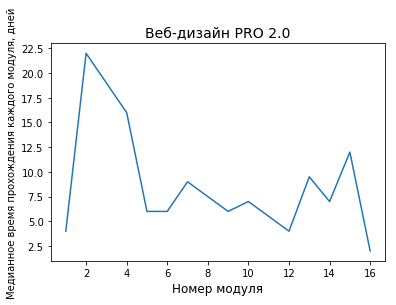

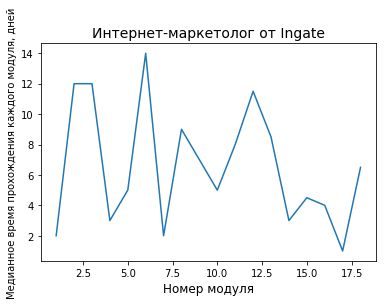

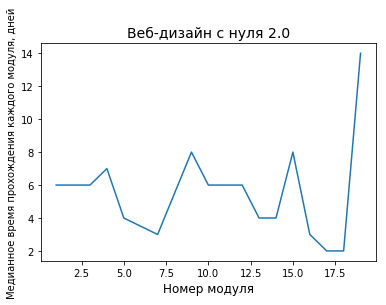

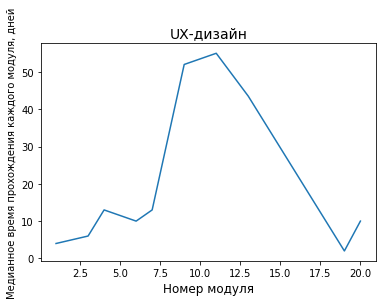

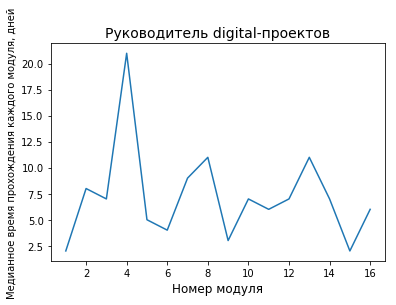

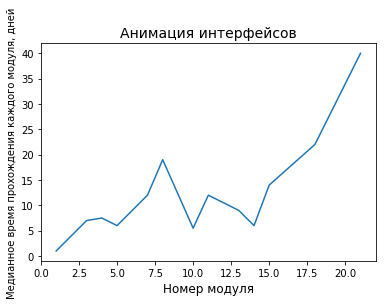

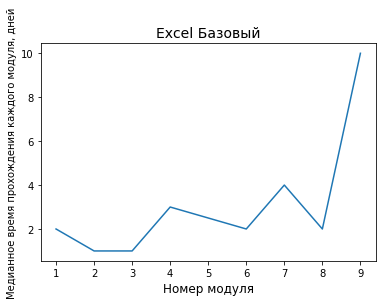

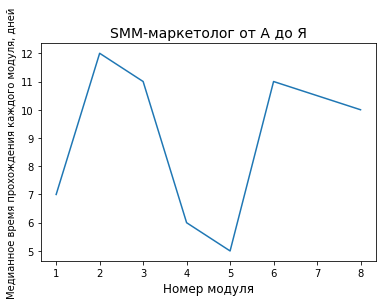

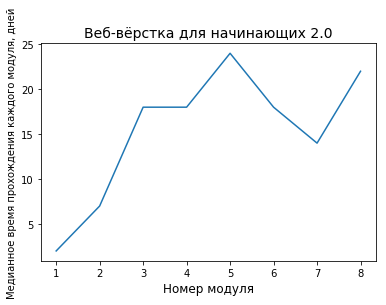

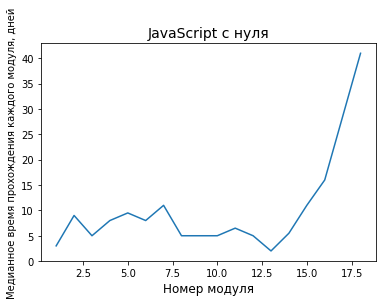

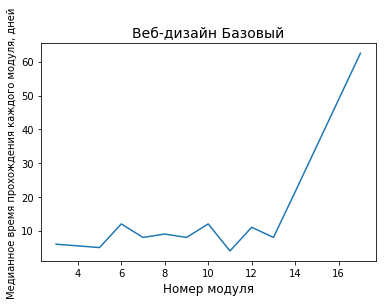

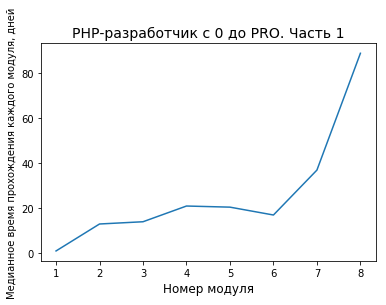

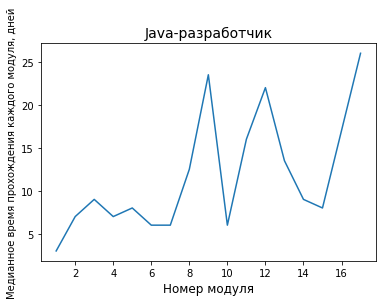

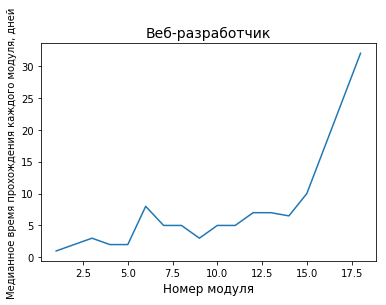

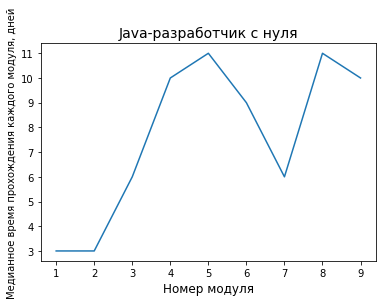

In [74]:
# Строим 15 line-graph с медианным временем прохождения кажд.модуля кажд.курса (line-chart) 
for elem in main_copy_mod['course_title'].unique():
    plt.plot(main_copy_mod[main_copy_mod['course_title'] == elem].groupby('module_number') \
    ['transit_time'].nunique().index, 
             main_copy_mod[main_copy_mod['course_title'] == elem].groupby('module_number') \
    ['transit_time'].median())
    plt.title(elem, fontsize=14)
    plt.xticks()
    plt.xlabel('Номер модуля', fontsize=12)
    plt.ylabel('Медианное время прохождения каждого модуля, дней', fontsize=10)
    plt.show()

Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [75]:
# готовим наш датасет для выявления сезонности через подсчет медианного времени ДЗ 
# добавим колонку "month" 
main_copy_mod['month'] = main_copy_mod['finish_date'].apply(lambda x: str(x)[5:7])
main_copy_mod.head()

,progress_id,module_number,lesson_number,start_date,finish_date,course_title,module_title,transit_time,month
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,2018-06-21 19:10:36,2018-06-28 15:59:25,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,6,06
17,a97393fe164b448e7231c07d48c82f9e,1,7,2018-02-19 12:30:34,2018-02-20 09:16:50,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",0,02
29,000962791295398b5ec7bc24f05269ac,7,5,2018-10-02 19:41:04,2018-10-05 17:02:51,Веб-дизайн с нуля 2.0,Основы работы с графикой,2,10
37,000962791295398b5ec7bc24f05269ac,13,6,2019-01-14 15:59:10,2019-01-23 06:22:01,Веб-дизайн с нуля 2.0,Адаптивность и мобильная версия,8,01
38,000962791295398b5ec7bc24f05269ac,12,5,2018-10-09 20:23:30,2019-01-17 08:27:10,Веб-дизайн с нуля 2.0,Формы и кнопки,99,01


In [76]:
# медианное время выполнения ДЗ по месяцам для каждого курса
for course in main_copy_mod['course_title'].unique():
    print(course)
    print(main_copy_mod[main_copy_mod['course_title'] == course].groupby('month') \
          ['transit_time'].median())
    print('-------------')

Веб-дизайн PRO 2.0
month
01    14.0
02     9.0
03     8.0
04     8.0
05     7.0
06     6.0
07     8.0
08    22.0
09    28.0
10    25.5
11    14.0
12    11.5
Name: transit_time, dtype: float64
-------------
Интернет-маркетолог от Ingate
month
01    5
02    3
03    5
04    7
05    7
06    7
07    5
08    5
09    4
10    7
11    7
12    4
Name: transit_time, dtype: int64
-------------
Веб-дизайн с нуля 2.0
month
01    5
02    6
03    5
04    4
05    4
06    4
07    4
08    5
09    7
10    7
11    7
12    6
Name: transit_time, dtype: int64
-------------
UX-дизайн
month
01    10.0
02     3.0
03    11.0
04    10.0
05     9.0
06     7.0
07     7.0
08     7.0
09     9.0
10    12.0
11    10.0
12     9.5
Name: transit_time, dtype: float64
-------------
Руководитель digital-проектов
month
01     5.5
02     1.0
03     5.0
04     6.0
05     6.0
06     6.0
07     6.0
08    12.0
09    10.0
10     5.0
11     5.0
12     6.0
Name: transit_time, dtype: float64
-------------
Анимация интерфейсов
month
01 

Описание данных.

Основные выводы по 3-му этапу: 

1. По полученным 15 графикам с медианным временем прохождения каждого модуля для каждого курса можно сказать, что: 

 - наибольшее медианное время прохождения выявлено у 3 курсов (11 модуль "UX-дизайн", 8 модуль "PHP-разработчик с 0 до PRO. Часть 1" и 17 модуль "Веб-дизайн Базовый" - 55, 89 и 62 дня соответственно). 
 
2. Из расчета медианного времени выполнения домашней работы по месяцам (12 месяцев) по каждому курсу заметно следующее: 

 - максимальная сезонность по количеству дней приходится на 3 месяца осени - от сентября до ноября; 
 
 - обратная картина наблюдается в феврале и июне-июле, т.е. минимальная сезонность. 

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [88]:
### YOUR CODE HERE ###

Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [93]:
# # готовим общий датасет для расчета конверсии перехода студентов 
main_copy_conv = main.copy()
main_copy_conv.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [94]:
# удалим "лишние колонки" 
main_copy_conv = main_copy_conv.drop(['progress_id', 
                                      'start_date', 
                                      'finish_date', 
                                      'course_id', 
                                      'course_field', 
                                      'lesson_token', 
                                      'is_video'], axis=1)

# нам нужны только ДЗ-шки с подтверждением наличия ДЗ 
main_copy_conv = main_copy_conv[(main_copy_conv['lesson_title'] == 'Домашняя работа') & 
                                (main_copy_conv['is_homework'] == True)]

main_copy_conv.head()

,module_number,lesson_number,status,student_id,course_title,module_title,lesson_title,is_homework
4,1,6,done,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Специализация и личное позиционирование,Домашняя работа,True
7,2,5,start,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Концептуальный дизайн,Домашняя работа,True
12,2,6,start,f69e2707b7ba94d49ca03ea9ed52ea5d,Интернет-маркетолог от Ingate,Исследование целевой аудитории: портретировани...,Домашняя работа,True
17,1,7,done,f69e2707b7ba94d49ca03ea9ed52ea5d,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен...",Домашняя работа,True
29,7,5,done,fcd7b6853c2582372980dd6af56d3bdc,Веб-дизайн с нуля 2.0,Основы работы с графикой,Домашняя работа,True


In [95]:
# удалим колонки чтобы не мешали, они сделали свое дело
main_copy_conv = main_copy_conv.drop(['lesson_title', 
                                      'is_homework'], axis=1)

main_copy_conv.head()

,module_number,lesson_number,status,student_id,course_title,module_title
4,1,6,done,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Специализация и личное позиционирование
7,2,5,start,768c2987a744c51ce64a5993a2a94eaf,Веб-дизайн PRO 2.0,Концептуальный дизайн
12,2,6,start,f69e2707b7ba94d49ca03ea9ed52ea5d,Интернет-маркетолог от Ingate,Исследование целевой аудитории: портретировани...
17,1,7,done,f69e2707b7ba94d49ca03ea9ed52ea5d,Интернет-маркетолог от Ingate,"Введение в интернет-маркетинг: цели, инструмен..."
29,7,5,done,fcd7b6853c2582372980dd6af56d3bdc,Веб-дизайн с нуля 2.0,Основы работы с графикой


In [96]:
# удалим из главного датасета строки со статусом 'wait'
main_copy_conv = main_copy_conv.drop(
    main_copy_conv[main_copy_conv['status'] == 'wait'].index)

main_copy_conv['status'].unique()

array(['done', 'start', 'fail'], dtype=object)

In [ ]:
# Как и в предыдущем задании (№3) помним, что в нашем 'любимом курсе' "Java-разработчик c нуля" 
# есть 4 модуля(6, 7, 8, 9), в каждом из которых несколько ДЗ: 
# 6-й - 4 ДЗ
# 7-й - 2 ДЗ
# 8-й - 3 ДЗ 
# 9-й - 5 ДЗ 

In [97]:
# Отделим их от основного датасета 
# Из датасета выберем курс "Java-разработчик c нуля"
main_copy_conv_jav = main_copy_conv[main_copy_conv['course_title'] == 'Java-разработчик c нуля']
main_copy_conv_jav.head()

,module_number,lesson_number,status,student_id,course_title,module_title
2393,1,7,done,9f5b2a1edcb6a434bf165fb26053c346,Java-разработчик c нуля,Вводный модуль
2404,2,6,fail,6303921b52b779bb223cd5e578bcb68f,Java-разработчик c нуля,Синтаксис языка
2407,1,7,done,6303921b52b779bb223cd5e578bcb68f,Java-разработчик c нуля,Вводный модуль
2517,2,6,done,645e6de703f36a001242dad5040f9a94,Java-разработчик c нуля,Синтаксис языка
2526,3,10,done,645e6de703f36a001242dad5040f9a94,Java-разработчик c нуля,Объекты и классы


In [98]:
# удалим из главного датасета наш 'любимый курс' "Java-разработчик c нуля"
# позже поработаем с ним отдельно 
main_copy_conv = main_copy_conv.drop(
    main_copy_conv[main_copy_conv['course_title'] == 'Java-разработчик c нуля'].index)

In [99]:
# отсортированные по возрастанию списки номеров модулей каждого курса 
for i in main_copy_conv['course_title'].unique():
    print(i)
    print(sorted(
        main_copy_conv[main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    )
         )
    print('----------')

Веб-дизайн PRO 2.0
[1, 2, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16]
----------
Интернет-маркетолог от Ingate
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
----------
Веб-дизайн с нуля 2.0
[1, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17]
----------
UX-дизайн
[1, 2, 3, 4, 6, 7, 11, 13, 19]
----------
Анимация интерфейсов
[1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 18]
----------
Веб-разработчик
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
----------
Руководитель digital-проектов
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
----------
Excel Базовый
[1, 2, 3, 4, 5, 6, 7, 8]
----------
SMM-маркетолог от А до Я
[1, 2, 3, 4, 5, 6, 8]
----------
JavaScript с нуля
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
----------
Веб-вёрстка для начинающих 2.0
[1, 2, 3, 4, 5, 6, 7, 8]
----------
Веб-дизайн Базовый
[3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
----------
PHP-разработчик с 0 до PRO. Часть 1
[1, 2, 3, 4, 5, 6, 7]
----------
Java-разработчик
[1, 2, 3, 4, 5, 6

In [100]:
# количество студентов приступивших к выполнению ДЗ в этом модуле 
for i in main_copy_conv['course_title'].unique():
    print(i)
    for elem in sorted(main_copy_conv[
        main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    ):
        print(str(elem) + ' module:')
        print(main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem]['student_id'].count())

Веб-дизайн PRO 2.0
1 module:
699
2 module:
505
5 module:
260
6 module:
228
7 module:
198
9 module:
158
10 module:
137
12 module:
118
13 module:
97
14 module:
80
15 module:
62
16 module:
50
Интернет-маркетолог от Ingate
1 module:
1870

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':



2 module:
1485
3 module:
835
4 module:
613
5 module:
535
6 module:
415
7 module:
320
8 module:
291
9 module:
236
10 module:
201
11 module:
188
12 module:
162
13 module:
118
14 module:
102
15 module:
88
16 module:
77
17 module:
68
Веб-дизайн с нуля 2.0
1 module:
1618
3 module:
1360
4 module:
1193
5 module:
1078
7 module:
990
9 module:
934
10 module:
801
11 module:
712
12 module:
635
13 module:
591
14 module:
550
15 module:
507
16 module:
457
17 module:
421
UX-дизайн
1 module:
773
2 module:
558
3 module:
479
4 module:
408
6 module:
311
7 module:
263
11 module:
95
13 module:
56
19 module:
30
Анимация интерфейсов
1 module:
342
2 module:
272
3 module:
216
4 module:
151
5 module:
112
7 module:
92
8 module:
70
10 module:
47
11 module:
41
12 module:
3
13 module:
32
14 module:
27
15 module:
23
18 module:
23
Веб-разработчик
1 module:
358
2 module:
303
3 module:
266
4 module:
222
5 module:
237
6 module:
199
7 module:
156
8 module:
126
9 module:
114
10 module:
96
11 module:
76
12 module:
70
13 mo

In [101]:
# количество студентов сдавших задание в предыдущем модуле
for i in main_copy_conv['course_title'].unique():
    print(i)
    for elem in sorted(main_copy_conv[
        main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    ):
        print(str(elem) + ' module:')
        print(main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem-1][main_copy_conv['status'] == 'done']['student_id'].count())

Веб-дизайн PRO 2.0
1 module:
0
2 module:
541
5 module:
0
6 module:
234
7 module:
195
9 module:
0
10 module:
136
12 module:


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0
13 module:
107
14 module:
76
15 module:
59
16 module:
48
Интернет-маркетолог от Ingate
1 module:
0
2 module:
1637
3 module:
925
4 module:
572
5 module:
561
6 module:
451
7 module:
284
8 module:
297
9 module:
238
10 module:
203
11 module:
187
12 module:
164
13 module:
118
14 module:
92
15 module:
92
16 module:
76
17 module:
70
Веб-дизайн с нуля 2.0
1 module:
0
3 module:
0
4 module:
1216
5 module:
1101
7 module:
0
9 module:
0
10 module:
809
11 module:
739
12 module:
638
13 module:
599
14 module:
556
15 module:
507
16 module:
452
17 module:
423
UX-дизайн
1 module:
0
2 module:
573
3 module:
486
4 module:
408
6 module:
0
7 module:
266
11 module:
0
13 module:
0
19 module:
0
Анимация интерфейсов
1 module:
0
2 module:
277
3 module:
218
4 module:
144
5 module:
120
7 module:
0
8 module:
71
10 module:
0
11 module:
42
12 module:
35
13 module:
0
14 module:
27
15 module:
24
18 module:
0
Веб-разработчик
1 module:
0
2 module:
308
3 module:
269
4 module:
242
5 module:
205
6 module:
217
7 module:
153


In [102]:
# список, в который будем записывать конверсию каждого курса 
conv_array = []

# для каждого курса из списка курсов общего датасета
for i in main_copy_conv['course_title'].unique():
    
    beg_list = [] # список, в который будем записывать колич-о студентов приступивших к ДЗ
    fin_list = [] # список, в который будем записывать колич-о студентов сдавших ДЗ
    
    for elem in sorted(main_copy_conv[
        main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    ): # для каждого модуля из списка модулей каждого курса 
        
        # количество студентов приступивших к выполнению ДЗ в этом модуле 
        begin = main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem]['student_id'].count()
        
        # количество студентов сдавших задание в предыдущем модуле
        final = main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem-1][main_copy_conv['status'] == 'done']['student_id'].count()
        
        beg_list.append(begin) # добавляем в список приступивших 
        fin_list.append(final) # добавляем в список сдавших 
        
    beg_sum = sum(beg_list) # суммируем количество студентов приступивших
    fin_sum = sum(fin_list) # суммируем количество студентов сдавших 
    
    # считаем конверсию для каждого курса 
    convers = round(((np.array(beg_sum) / np.array(fin_sum))*100), 2)
    conv_array.append(convers)
    
print(conv_array)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[185.67, 127.43, 168.28, 171.55, 151.46, 119.19, 120.16, 118.84, 172.27, 125.55, 139.23, 138.22, 151.78, 121.62]


In [103]:
# Итак, отработаем наш "особенный курс" 'Java-разработчик c нуля'
# отсортированный по возрастанию список номеров модулей  

print(sorted(main_copy_conv_jav['module_number'].unique().tolist()))

[1, 2, 3, 6, 7, 8, 9]


In [104]:
# выберем 6-й модуль 
main_copy_conv_j6 = main_copy_conv_jav[(main_copy_conv_jav['module_number'] == 6)]

# выберем 7-й модуль 
main_copy_conv_j7 = main_copy_conv_jav[(main_copy_conv_jav['module_number'] == 7)]

# выберем 8-й модуль 
main_copy_conv_j8 = main_copy_conv_jav[(main_copy_conv_jav['module_number'] == 8)]

# выберем 9-й модуль 
main_copy_conv_j9 = main_copy_conv_jav[(main_copy_conv_jav['module_number'] == 9)]

###################### 
# уберем последовательно из курса 'Java-разработчик c нуля' ТОЛЬКО те модули, 
# где больше одного ДЗ на модуль

# минус 6 модуль
main_copy_conv_jav = main_copy_conv_jav.drop(
    main_copy_conv_jav[main_copy_conv_jav['module_number'] == 6].index)

# минус 7 модуль
main_copy_conv_jav = main_copy_conv_jav.drop(
    main_copy_conv_jav[main_copy_conv_jav['module_number'] == 7].index)

# минус 8 модуль
main_copy_conv_jav = main_copy_conv_jav.drop(
    main_copy_conv_jav[main_copy_conv_jav['module_number'] == 8].index)

# минус 9 модуль
main_copy_conv_jav = main_copy_conv_jav.drop(
    main_copy_conv_jav[main_copy_conv_jav['module_number'] == 9].index)

In [105]:
# Курс 'Java-разработчик c нуля' с 6-го по 9-й модуль : 
# отсортированные по возрастанию списки номеров уроков с 6-го по 9-й модуль (у которых неск-ко ДЗ)
list_6 = sorted(main_copy_conv_j6['lesson_number'].unique().tolist())
list_7 = sorted(main_copy_conv_j7['lesson_number'].unique().tolist())
list_8 = sorted(main_copy_conv_j8['lesson_number'].unique().tolist())
list_9 = sorted(main_copy_conv_j9['lesson_number'].unique().tolist())
list_conv_java = [list_6, list_7, list_8, list_9]
for elem in list_conv_java:
    print(elem)

[2, 4, 6, 13]
[2, 8]
[4, 8, 11]
[5, 7, 9, 12, 14]


In [106]:
beg_j = [] # список, в который будем записывать колич-о студентов приступивших к ДЗ
fin_j = [] # список, в который будем записывать колич-о студентов сдавших ДЗ
    
for elem in sorted(main_copy_conv_jav['module_number'].unique().tolist()): 
    
    # количество студентов приступивших к выполнению ДЗ в этом модуле 
    begin_jav = main_copy_conv_jav[
        main_copy_conv_jav['module_number'] == elem]['student_id'].count()
    
    # количество студентов сдавших задание в предыдущем модуле
    final_jav = main_copy_conv_jav[
        main_copy_conv_jav['module_number'] == elem-1][
        main_copy_conv_jav['status'] == 'done']['student_id'].count()
    
    beg_j.append(begin_jav) # добавляем в список приступивших 
    fin_j.append(final_jav) # добавляем в список сдавших 
    
beg_sum_j = sum(beg_j) # суммируем количество студентов приступивших
fin_sum_j = sum(fin_j) # суммируем количество студентов сдавших 
print(beg_sum_j)
print(fin_sum_j)

897
504


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [107]:
# первые и последние ДЗ в модулях: 
# list_6[0], list_6[-1]
# list_7[0], list_7[-1]
# list_8[0], list_8[-1]
# list_9[0], list_9[-1]

# Суммируем количество приступивших 
sum_4_mods_beg = sum([main_copy_conv_j6[main_copy_conv_j6['lesson_number'] == list_6[0]][
    'student_id'].count(), 
                     main_copy_conv_j7[main_copy_conv_j7['lesson_number'] == list_7[0]][
    'student_id'].count(), 
                     main_copy_conv_j8[main_copy_conv_j8['lesson_number'] == list_8[0]][
    'student_id'].count(), 
                     main_copy_conv_j9[main_copy_conv_j9['lesson_number'] == list_9[0]][
    'student_id'].count()])

# Суммируем количество сдавших
sum_4_mods_fin = sum([main_copy_conv_j6[main_copy_conv_j6['lesson_number'] == list_6[-1]][
     main_copy_conv_j6['status'] == 'done']['student_id'].count(), 
                     main_copy_conv_j7[main_copy_conv_j7['lesson_number'] == list_7[-1]][
     main_copy_conv_j7['status'] == 'done']['student_id'].count(), 
                     main_copy_conv_j8[main_copy_conv_j8['lesson_number'] == list_8[-1]][
     main_copy_conv_j8['status'] == 'done']['student_id'].count(), 
                     main_copy_conv_j9[main_copy_conv_j9['lesson_number'] == list_9[-1]][
     main_copy_conv_j9['status'] == 'done']['student_id'].count()])

# конверсия нашего "прекрасного" курса 'Java-разработчик c нуля':
convers_jav = round(((beg_sum_j + sum_4_mods_beg) / (fin_sum_j + sum_4_mods_fin)*100), 2)

# Добавим ее в наш доблестный список конверсий:  
conv_array.append(convers_jav)
print(conv_array)

[185.67, 127.43, 168.28, 171.55, 151.46, 119.19, 120.16, 118.84, 172.27, 125.55, 139.23, 138.22, 151.78, 121.62, 175.66]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [108]:
# Таблица с данными по конверсиям курсов  
Conv_table = pd.DataFrame({'Courses': main['course_title'].unique(), 
                           'Conversion':conv_array
                          }, 
                          columns = ['Courses','Conversion'])

Conv_table

,Courses,Conversion
0,Веб-дизайн PRO 2.0,185.67
1,Интернет-маркетолог от Ingate,127.43
2,UX-дизайн,168.28
3,JavaScript с нуля,171.55
4,Веб-дизайн с нуля 2.0,151.46
5,Веб-разработчик,119.19
6,Анимация интерфейсов,120.16
7,Веб-вёрстка для начинающих 2.0,118.84
8,Руководитель digital-проектов,172.27
9,PHP-разработчик с 0 до PRO. Часть 1,125.55


Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

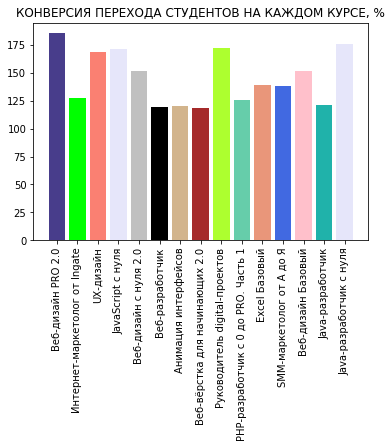

In [109]:
# bar-chart отражающий конверсию перехода студентов из одного модуля в другой 
import random

# список всех цветов matplotlib
all_colors = list(plt.cm.colors.cnames.keys()) 

# 15 рандомно выбранных цветов для 15 курсов 
c = random.choices(all_colors, 
                   k = Conv_table['Courses'].unique().__len__()+1)

# строим сам график 
xAxis = [i for i, _ in enumerate(Conv_table['Courses'])] 
plt.bar(xAxis, Conv_table['Conversion'].astype(float), 
        color = c)
plt.title('КОНВЕРСИЯ ПЕРЕХОДА СТУДЕНТОВ НА КАЖДОМ КУРСЕ, %', fontsize=12)
plt.xticks([i for i, _ in enumerate(Conv_table['Courses'])], 
           Conv_table['Courses'], 
           rotation='vertical')

plt.show()

Описание данных.

Основные выводы по 4-му этапу: 

Основываясь на построенном графике с данными по конверсиям курсов имеем: 

 - 3 курса с наибольшей конверсией перехода из модуля в модуль ("Веб-дизайн PRO 2.0", "Java-разработчик с нуля", "Руководитель digital-проектов"); 
 
 - 3 курса с наименьшей конверсией перехода из модуля в модуль ("Веб-вёрстка для начинающих 2.0", "Веб-разработчик", "Анимация интерфейсов"). 

ВАРИАНТ РЕШЕНИЯ ЭТОГО ЖЕ ЗАДАНИЯ № 2:

Рассмотрим каждый модуль!

In [110]:
# ЕЩЁ РАЗ! 
# количество студентов приступивших к выполнению ДЗ в ЭТОМ модуле 
for i in main_copy_conv['course_title'].unique():
    print(i)
    for elem in sorted(main_copy_conv[
        main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    ):
        print(str(elem) + ' module:')
        print(main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem]['student_id'].count())
    print('---------------')    

Веб-дизайн PRO 2.0
1 module:
699
2 module:
505
5 module:
260
6 module:
228
7 module:
198
9 module:
158
10 module:
137
12 module:
118
13 module:
97
14 module:
80
15 module:
62
16 module:
50
---------------
Интернет-маркетолог от Ingate
1 module:
1870

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.



2 module:
1485
3 module:
835
4 module:
613
5 module:
535
6 module:
415
7 module:
320
8 module:
291
9 module:
236
10 module:
201
11 module:
188
12 module:
162
13 module:
118
14 module:
102
15 module:
88
16 module:
77
17 module:
68
---------------
Веб-дизайн с нуля 2.0
1 module:
1618
3 module:
1360
4 module:
1193
5 module:
1078
7 module:
990
9 module:
934
10 module:
801
11 module:
712
12 module:
635
13 module:
591
14 module:
550
15 module:
507
16 module:
457
17 module:
421
---------------
UX-дизайн
1 module:
773
2 module:
558
3 module:
479
4 module:
408
6 module:
311
7 module:
263
11 module:
95
13 module:
56
19 module:
30
---------------
Анимация интерфейсов
1 module:
342
2 module:
272
3 module:
216
4 module:
151
5 module:
112
7 module:
92
8 module:
70
10 module:
47
11 module:
41
12 module:
3
13 module:
32
14 module:
27
15 module:
23
18 module:
23
---------------
Веб-разработчик
1 module:
358
2 module:
303
3 module:
266
4 module:
222
5 module:
237
6 module:
199
7 module:
156
8 module:
1

In [111]:
# количество студентов сдавших задание в ЭТОМ (ИМЕННО В ЭТОМ) модуле
# ATTENTION!!! В ПОСЛЕДУЮЩЕЙ ЯЧЕЙКЕ БУДЕТ МАЛЕНЬКИЙ ФОКУС 
for i in main_copy_conv['course_title'].unique():
    print(i)
    for elem in sorted(main_copy_conv[
        main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    ):
        print(str(elem) + ' module:')
        print(main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem][main_copy_conv['status'] == 'done']['student_id'].count())
    print('---------------')

Веб-дизайн PRO 2.0
1 module:
541
2 module:
330
5 module:
234
6 module:
195
7 module:
170
9 module:
136
10 module:
116
12 module:
107

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.



13 module:
76
14 module:
59
15 module:
48
16 module:
38
---------------
Интернет-маркетолог от Ingate
1 module:
1637
2 module:
925
3 module:
572
4 module:
561
5 module:
451
6 module:
284
7 module:
297
8 module:
238
9 module:
203
10 module:
187
11 module:
164
12 module:
118
13 module:
92
14 module:
92
15 module:
76
16 module:
70
17 module:
61
---------------
Веб-дизайн с нуля 2.0
1 module:
1360
3 module:
1216
4 module:
1101
5 module:
1015
7 module:
942
9 module:
809
10 module:
739
11 module:
638
12 module:
599
13 module:
556
14 module:
507
15 module:
452
16 module:
423
17 module:
404
---------------
UX-дизайн
1 module:
573
2 module:
486
3 module:
408
4 module:
324
6 module:
266
7 module:
213
11 module:
55
13 module:
26
19 module:
19
---------------
Анимация интерфейсов
1 module:
277
2 module:
218
3 module:
144
4 module:
120
5 module:
97
7 module:
71
8 module:
47
10 module:
42
11 module:
35
12 module:
0
13 module:
27
14 module:
24
15 module:
19
18 module:
17
---------------
Веб-разработ

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


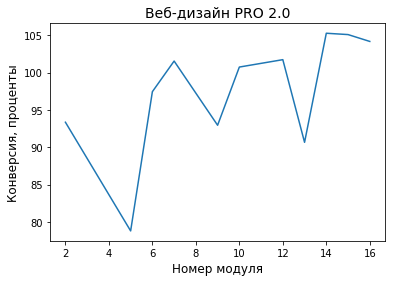

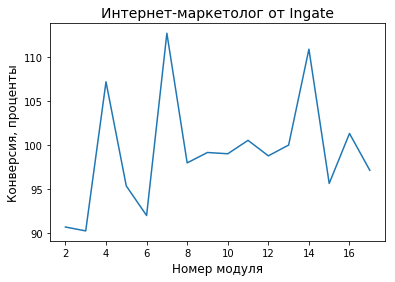

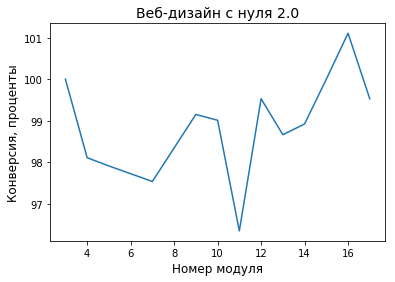

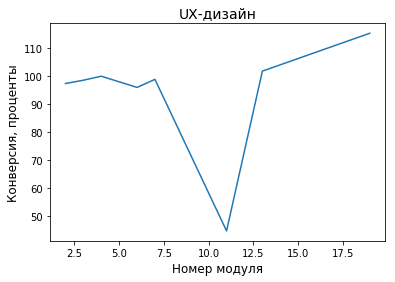

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


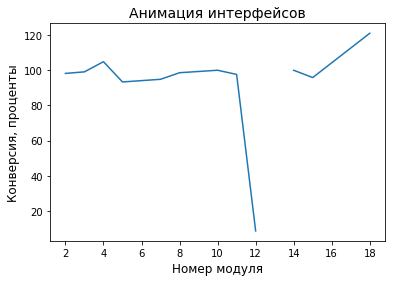

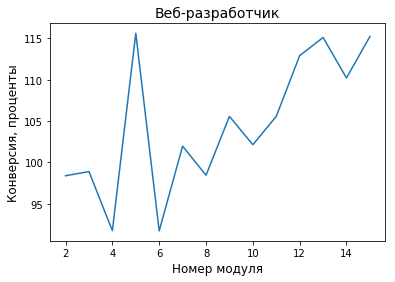

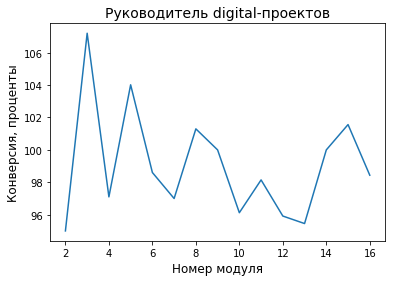

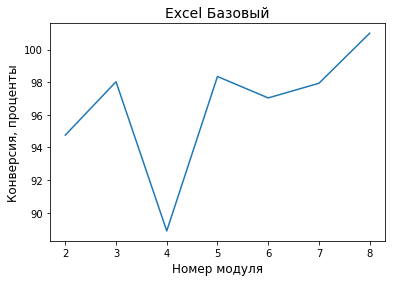

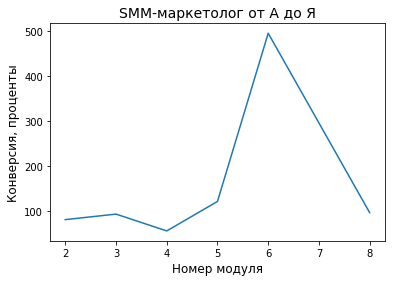

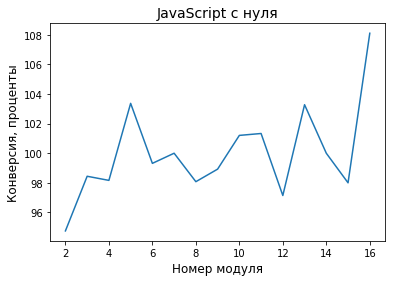

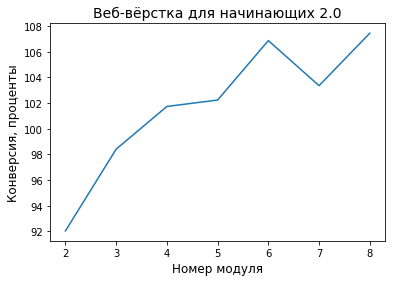

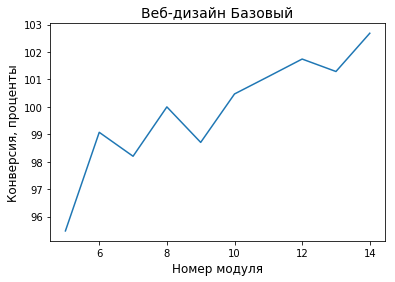

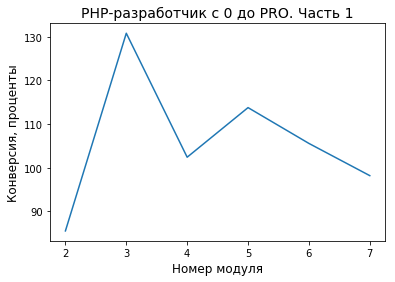

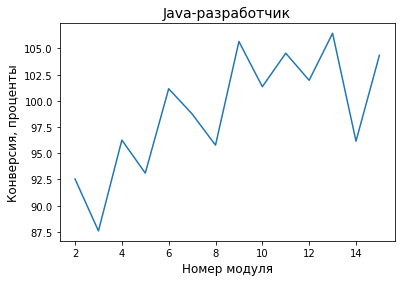

In [112]:
# для каждого курса из списка курсов общего датасета
for i in main_copy_conv['course_title'].unique():
    
    beg_l = [] # список, в который будем записывать колич-о студентов приступивших к ДЗ
    fin_l = [] # список, в который будем записывать колич-о студентов сдавших ДЗ
    
    for elem in sorted(main_copy_conv[
        main_copy_conv['course_title'] == i]['module_number'].unique().tolist()
    ): # для каждого модуля из списка модулей каждого курса 
        
        # количество студентов приступивших к выполнению ДЗ в этом модуле 
        begin = main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem]['student_id'].count()
        
        # количество студентов сдавших задание в этом модуле
        final = main_copy_conv[main_copy_conv['course_title'] == i][main_copy_conv
     ['module_number'] == elem][main_copy_conv['status'] == 'done']['student_id'].count()
        
        beg_l.append(begin) # добавляем в список приступивших 
        fin_l.append(final) # добавляем в список сдавших 
        
    # маленький фокус для корректного деления
    begin_all = beg_l[1:] # список приступивших к ДЗ в этом модуле
    final_done = fin_l[:-1] # список сдавших ДЗ в предыдущем модуле 
    
    # считаем конверсию для каждого модуля каждого курса 
    convertion = ((np.array(begin_all) / np.array(final_done))*100)

    # строим графики 
    plt.plot(sorted(main_copy_conv[main_copy_conv[
        'course_title'] == i]['module_number'].unique().tolist())[1:], 
             convertion)
    plt.title(i, fontsize=14)
    plt.xticks()
    plt.xlabel('Номер модуля', fontsize=12)
    plt.ylabel('Конверсия, проценты', fontsize=12)
    plt.show()

In [113]:
# те же действия проведем с нашим "особенным курсом" Java-разработчик c нуля
beg_j1 = [] # список, в который будем записывать колич-о студентов приступивших к ДЗ
fin_j1 = [] # список, в который будем записывать колич-о студентов сдавших ДЗ
    
for elem in sorted(main_copy_conv_jav['module_number'].unique().tolist()): 
    
    # количество студентов приступивших к выполнению ДЗ в этом модуле 
    begin_jav1 = main_copy_conv_jav[
        main_copy_conv_jav['module_number'] == elem]['student_id'].count()
    
    # количество студентов сдавших задание в этом модуле
    final_jav1 = main_copy_conv_jav[
        main_copy_conv_jav['module_number'] == elem][
        main_copy_conv_jav['status'] == 'done']['student_id'].count()
    
    beg_j1.append(begin_jav1) # добавляем в список приступивших 
    fin_j1.append(final_jav1) # добавляем в список сдавших 

    begin_all_jav = beg_j1[1:] # список приступивших к ДЗ в этом модуле
    final_done_jav = fin_j1[:-1] # список сдавших ДЗ в предыдущем модуле 

    # считаем конверсию для каждого модуля курса "Java-разработчик c нуля"
    convertion_jav = ((np.array(begin_all_jav) / np.array(final_done_jav))*100)
    
# конверсия 2 и 3 модулей курса "Java-разработчик c нуля" 
print(convertion_jav)

[97.52650177 94.57013575]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [114]:
# количество студентов, сдавших ДЗ в 3 модуле курса 'Java-разработчик c нуля'
final_done_jav_3mod = 150

# конверсия 2 и 3 модулей курса "Java-разработчик c нуля"
cnv_j = [97.53, 94.57]

In [115]:
# модули курса "Java-разработчик c нуля", у которых несколько ДЗ:  

# первые и последние ДЗ в модулях: 
# list_6[0], list_6[-1]
# list_7[0], list_7[-1]
# list_8[0], list_8[-1]
# list_9[0], list_9[-1]

# конверсия 6-го модуля 
c_6 = ((main_copy_conv_j6[main_copy_conv_j6['lesson_number'] == list_6[0]][
    'student_id'].count()) / (final_done_jav_3mod) * 100)

# конверсия 7-го модуля
c_7 = ((main_copy_conv_j7[main_copy_conv_j7['lesson_number'] == list_7[0]][
    'student_id'].count()) / (main_copy_conv_j6[main_copy_conv_j6[
    'lesson_number'] == list_6[-1]][main_copy_conv_j6['status'] == 'done'][
    'student_id'].count()) * 100) 

# конверсия 8-го модуля
c_8 = ((main_copy_conv_j8[main_copy_conv_j8['lesson_number'] == list_8[0]][
    'student_id'].count()) / (main_copy_conv_j7[main_copy_conv_j7[
    'lesson_number'] == list_7[-1]][main_copy_conv_j7['status'] == 'done'][
    'student_id'].count()) * 100)  

# конверсия 9-го модуля
c_9 = ((main_copy_conv_j9[main_copy_conv_j9['lesson_number'] == list_9[0]][
    'student_id'].count()) / (main_copy_conv_j8[main_copy_conv_j8[
    'lesson_number'] == list_8[-1]][main_copy_conv_j8['status'] == 'done'][
    'student_id'].count()) * 100)

print(c_6)
print(c_7)
print(c_8)
print(c_9)

48.66666666666667
106.25
83.78378378378379
94.11764705882352


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [116]:
# добавим в список конверсий 2-го и 3-го модулей курса "Java-разработчик c нуля" остатки (6,7,8,9)
list_c_jjj = [c_6, c_7, c_8, c_9]
for num in list_c_jjj: 
    cnv_j.append(num)
print(cnv_j)

[97.53, 94.57, 48.66666666666667, 106.25, 83.78378378378379, 94.11764705882352]


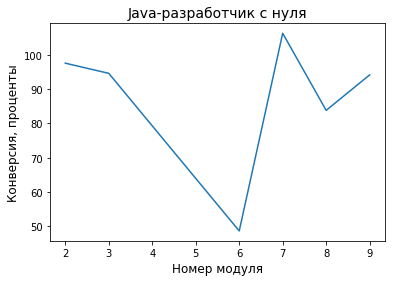

In [117]:
# График конверсий всех модулей с ДЗ для курса "Java-разработчик c нуля"
list_all_mod_jav = [2, 3, 6, 7, 8, 9]

plt.plot(list_all_mod_jav, cnv_j)
plt.title('Java-разработчик c нуля', fontsize=14)
plt.xticks()
plt.xlabel('Номер модуля', fontsize=12)
plt.ylabel('Конверсия, проценты', fontsize=12)
plt.show()

Описание данных по варианту № 2: 

1. Наименьшее значение конверсии у модуля 6 курса "Java-разработчик c нуля" (47%).

2. Наибольшее значение конверсии у модуля 6 курса "SMM-маркетолог от А до Я" (чуть менее 500%).